# Problem Statement 1:

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.


1. You are provided with the weekly sales data for their various outlets. Use statistical
   analysis, EDA, outlier analysis, and handle the missing values to come up with various
   insights that can give them a clear perspective on the following:

* A. If the weekly sales are affected by the unemployment rate, if yes - which stores
   are suffering the most?

* B. If the weekly sales show a seasonal trend, when and what could be the reason?

* C. Does temperature affect the weekly sales in any manner?

* D. How is the Consumer Price index affecting the weekly sales of various stores?

* E. Top performing stores according to the historical data.

* F-1. The worst performing store, and how significant is the difference between the
       highest and lowest performing stores.

* F-2. Use predictive modeling techniques to forecast the sales for each store for the next 12weeks.

##### loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib import dates
from datetime import datetime
import sklearn

In [2]:
#loading the dataset
df=pd.read_csv(r'C:\Users\Rishi\Downloads\DataSet.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


##### Pre-Processing

In [4]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,691",0,42,3,211,8
1,1,12-02-2010,"1,641,957",1,39,3,211,8
2,1,19-02-2010,"1,611,968",0,40,3,211,8
3,1,26-02-2010,"1,409,728",0,47,3,211,8
4,1,05-03-2010,"1,554,807",0,46,3,211,8


In [7]:
# data distribution
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [8]:
## Checking for Missing Values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

* Conclusion

The dataset doesn't have any missing values

In [9]:
## Checking Duplicate val
df.duplicated().sum()

0

*  Conclusion

The dataset doesn't have any Duplicate values

In [10]:
### Renaming Columns and changing Date column into Date format
df.columns = df.columns.str.lower()

df.rename({'holiday_flag': 'is_holiday'}, axis =1, inplace = True)

# correct data format of the 'date' column
df['date'] = pd.to_datetime(df['date'], format = "%d-%m-%Y")

In [11]:
df

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,"1,643,691",0,42,3,211,8
1,1,2010-02-12,"1,641,957",1,39,3,211,8
2,1,2010-02-19,"1,611,968",0,40,3,211,8
3,1,2010-02-26,"1,409,728",0,47,3,211,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,174",0,65,4,192,9
6431,45,2012-10-05,"733,455",0,65,4,192,9
6432,45,2012-10-12,"734,464",0,54,4,192,9
6433,45,2012-10-19,"718,126",0,56,4,192,9


##### Feature Engineering

In [12]:
# Creating a new column "year" containing the year
df['year'] = df['date'].dt.year

# Creating a new column "month" containing the month number
df['month'] = df['date'].dt.month

# Creating a new column "month_name" containing the month names
df['month_name'] = df['date'].dt.month_name()

# Creating a new column "week" containing the week number
df['week'] = df['date'].dt.isocalendar().week

# Creating a new column "day_of_week" containing the day names
df['day_name'] = df['date'].dt.day_name()

# Creating a new column "quarter" containing the season number
df['quarter'] = df['date'].dt.quarter

In [13]:
#Function to retrieve the season.
def get_season(quarter):

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [14]:
# Creating a new column "season" containing the season
df['season'] = df['quarter'].apply(get_season)

In [15]:
df

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,month,month_name,week,day_name,quarter,season
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,2,February,5,Friday,1,Winter
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,2,February,6,Friday,1,Winter
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,2,February,7,Friday,1,Winter
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,2,February,8,Friday,1,Winter
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,3,March,9,Friday,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,174",0,65,4,192,9,2012,9,September,39,Friday,3,Summer
6431,45,2012-10-05,"733,455",0,65,4,192,9,2012,10,October,40,Friday,4,Autumn
6432,45,2012-10-12,"734,464",0,54,4,192,9,2012,10,October,41,Friday,4,Autumn
6433,45,2012-10-19,"718,126",0,56,4,192,9,2012,10,October,42,Friday,4,Autumn


### Exploratory Data Analysis

* Univariate Analysis in Numerical Data

In [16]:
numerical_columns = df.select_dtypes(include=['number'])

In [17]:
numerical_columns

,store,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,month,week,quarter
0,1,"1,643,691",0,42,3,211,8,2010,2,5,1
1,1,"1,641,957",1,39,3,211,8,2010,2,6,1
2,1,"1,611,968",0,40,3,211,8,2010,2,7,1
3,1,"1,409,728",0,47,3,211,8,2010,2,8,1
4,1,"1,554,807",0,46,3,211,8,2010,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,"713,174",0,65,4,192,9,2012,9,39,3
6431,45,"733,455",0,65,4,192,9,2012,10,40,4
6432,45,"734,464",0,54,4,192,9,2012,10,41,4
6433,45,"718,126",0,56,4,192,9,2012,10,42,4


In [18]:
#Removing 'is_holiday','year','month','week','quarter'
numerical_columns = numerical_columns.drop(columns=['is_holiday','year','month','week','quarter'])

In [19]:
numerical_columns

,store,weekly_sales,temperature,fuel_price,cpi,unemployment
0,1,"1,643,691",42,3,211,8
1,1,"1,641,957",39,3,211,8
2,1,"1,611,968",40,3,211,8
3,1,"1,409,728",47,3,211,8
4,1,"1,554,807",46,3,211,8
...,...,...,...,...,...,...
6430,45,"713,174",65,4,192,9
6431,45,"733,455",65,4,192,9
6432,45,"734,464",54,4,192,9
6433,45,"718,126",56,4,192,9


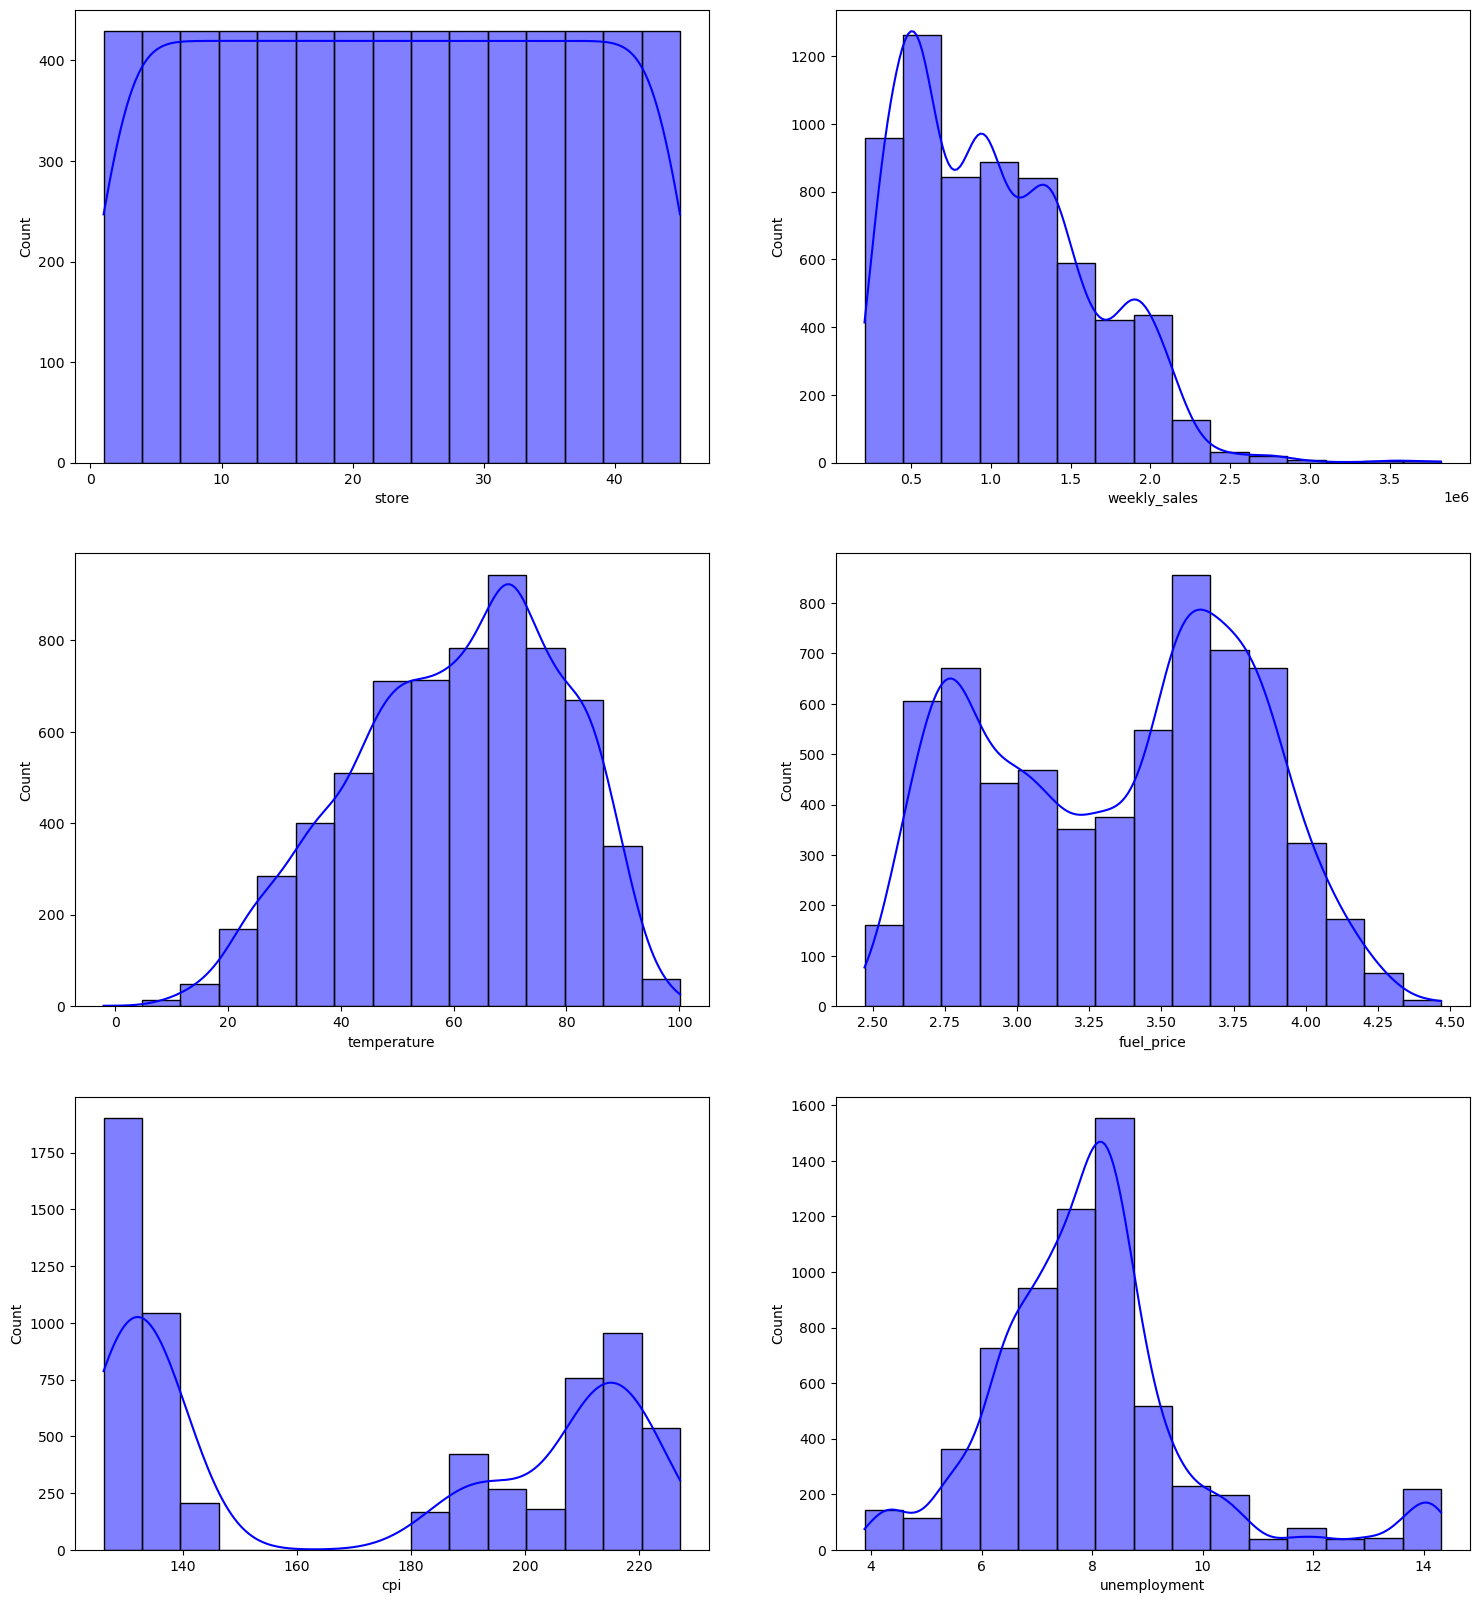

In [20]:
#Plotting histogram with KDE to check the distribution.
plt.figure(figsize=(18, 20))
for i,col in enumerate(numerical_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = 15, color = 'b')
plt.show()

###### Conclusion:

* Store is uniformly distributed.
* Weekly sales is right skew.
* Temperature and Unemployment is almost normally distributed.
* CPI and Fuel_Price have bimodal distribution.

#### Univariate Analysis in Categorical Data

* is_holiday

<Axes: xlabel='is_holiday', ylabel='count'>

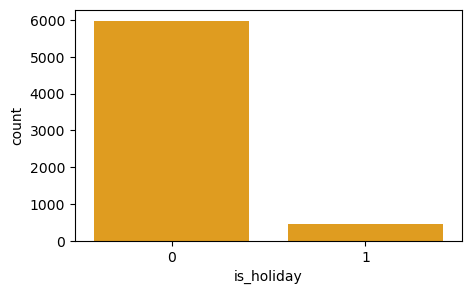

In [21]:
plt.figure(figsize=(5, 3))
sns.countplot(data = df, x = 'is_holiday',color='orange')

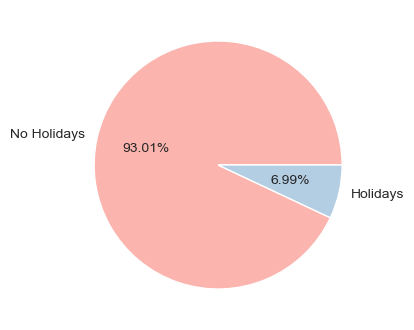

In [22]:
cmap = plt.get_cmap('Pastel1')
sns.set_style("whitegrid")
plt.figure(figsize=(4, 6))
plt.pie(df['is_holiday'].value_counts(),
          labels = ['No Holidays', 'Holidays'],
          autopct = '%1.2f%%',colors=cmap.colors)
plt.show()

##### Conclusion:

* Days of no holiday are the most frequent than days of holiday in the dataset with a percentage of 93 % and this is normal.

### year

<Axes: xlabel='year', ylabel='count'>

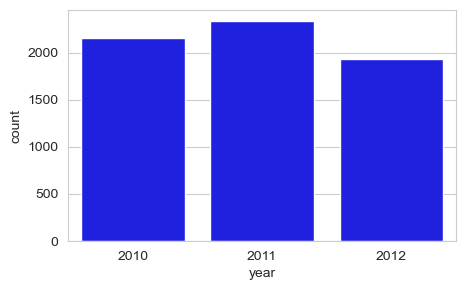

In [23]:
plt.figure(figsize=(5, 3))
sns.countplot(data = df, x = 'year',color='blue')

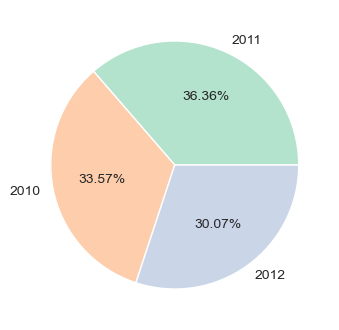

In [24]:
cmap = plt.get_cmap('Pastel2')
sns.set_style("whitegrid")
plt.figure(figsize=(4, 6))
plt.pie(df['year'].value_counts(),
          labels = df['year'].value_counts().index,
          autopct = '%1.2f%%',colors=cmap.colors)
plt.show()

##### Conclusion:

* 2011 is the most frequent in the dataset.

### Season

<Axes: xlabel='season', ylabel='count'>

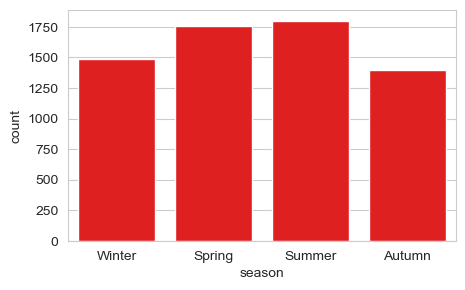

In [25]:
plt.figure(figsize=(5, 3))
sns.countplot(data = df, x = 'season',color='red')

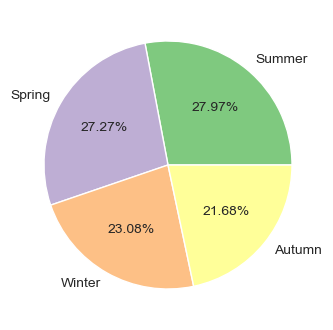

In [26]:
cmap = plt.get_cmap('Accent')
sns.set_style("whitegrid")
plt.figure(figsize=(4, 6))
plt.pie(df['season'].value_counts(),
          labels = df['season'].value_counts().index,
          autopct = '%1.2f%%',colors=cmap.colors)
plt.show()

#### Conclusion:

* Summer is the most frequent in the dataset.

### Month

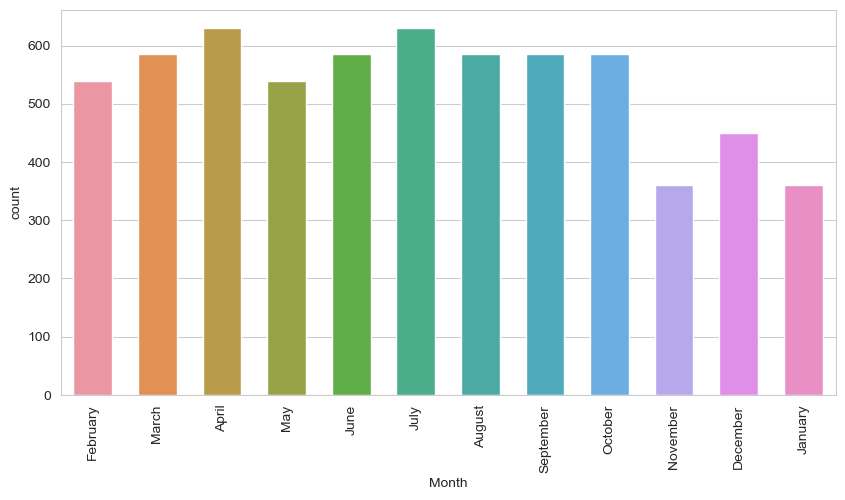

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'month_name',width=0.6)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Month')
plt.show()

##### Conclusion:

* April and July are the most frequent in the dataset because most of the weekly sales were recorded in these months.

### Total sales in each year.

In [28]:
sales_by_year = df.groupby('year')['weekly_sales'].sum().sort_values(ascending = False).reset_index()

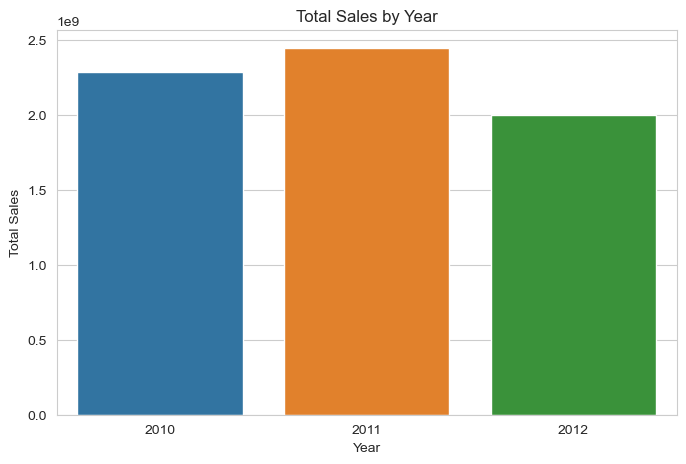

In [29]:
plt.figure(figsize = (8, 5))
sns.barplot(data = sales_by_year,x = 'year',y = 'weekly_sales')
#Adding Labels and title
plt.title('Total Sales by Year')
plt.xlabel('Year', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

##### Conclusion:

* 2011 has the highest sales.

### Total sales in each season.

In [30]:
sales_by_season = df.groupby('season')['weekly_sales'].sum().sort_values(ascending = False).reset_index()

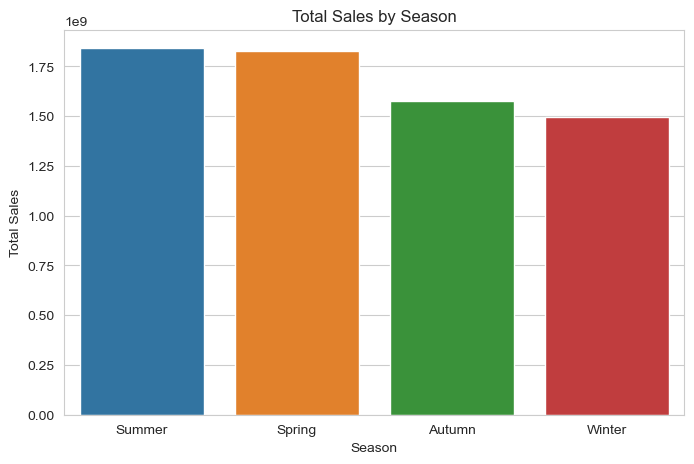

In [31]:
plt.figure(figsize = (8, 5))
sns.barplot(data = sales_by_season,x = 'season',y = 'weekly_sales')
#Adding Labels and title
plt.title('Total Sales by Season')
plt.xlabel('Season', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

#### Conclusion

* Sales are higher in Summer season.

### day_name

In [32]:
df['day_name'].value_counts()

day_name
Friday    6435
Name: count, dtype: int64

#### Conclusion:

* Each record has been recorded on Friday.

In [33]:
df

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,month,month_name,week,day_name,quarter,season
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,2,February,5,Friday,1,Winter
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,2,February,6,Friday,1,Winter
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,2,February,7,Friday,1,Winter
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,2,February,8,Friday,1,Winter
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,3,March,9,Friday,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,174",0,65,4,192,9,2012,9,September,39,Friday,3,Summer
6431,45,2012-10-05,"733,455",0,65,4,192,9,2012,10,October,40,Friday,4,Autumn
6432,45,2012-10-12,"734,464",0,54,4,192,9,2012,10,October,41,Friday,4,Autumn
6433,45,2012-10-19,"718,126",0,56,4,192,9,2012,10,October,42,Friday,4,Autumn


## Bi-variate Analysis

#### Which store has the highest sales.

In [34]:
sales_by_store = df.groupby('store')['weekly_sales'].sum().sort_values(ascending = False)

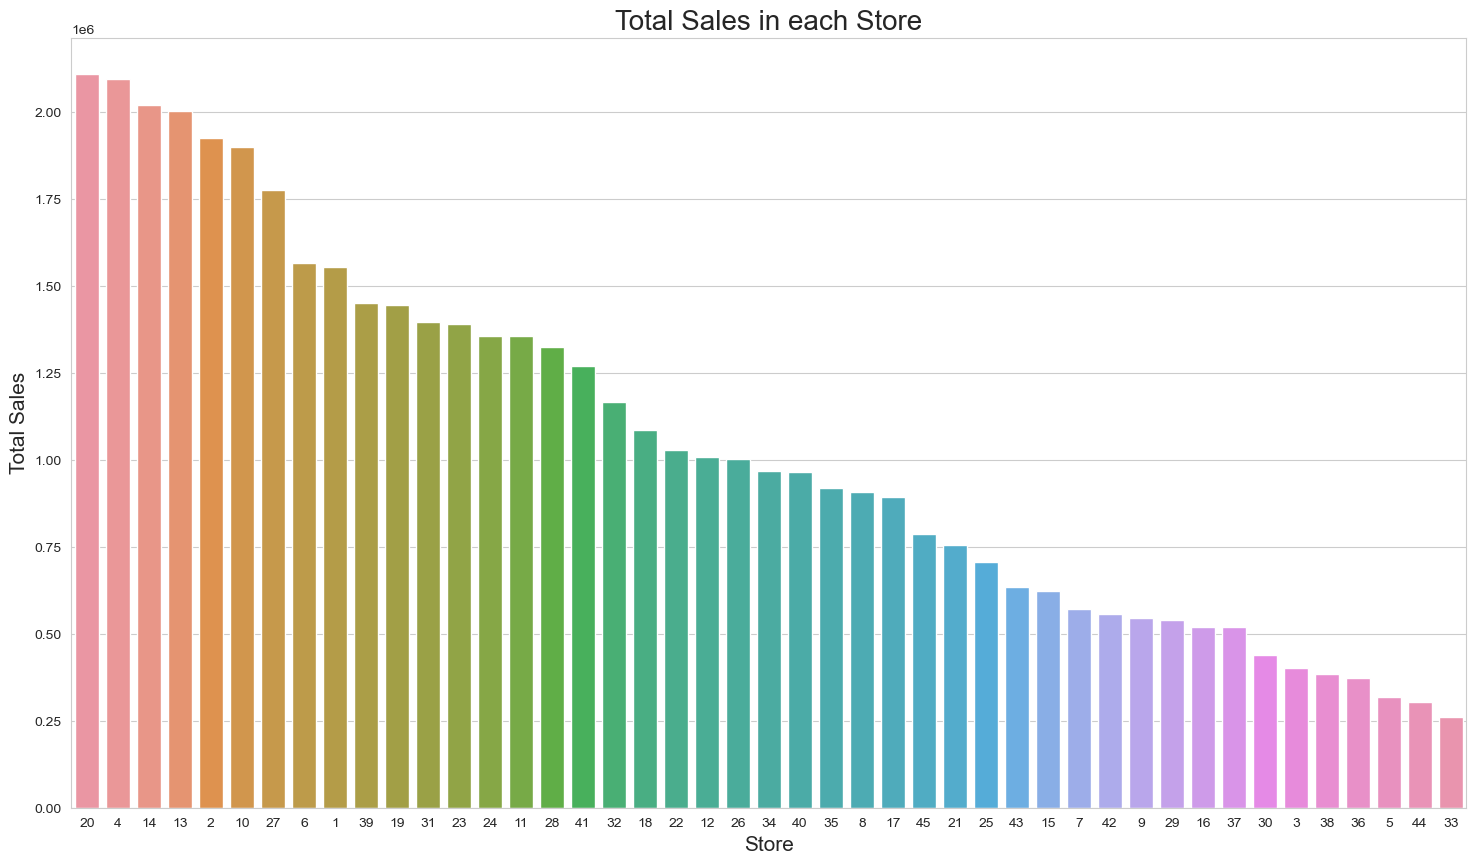

In [35]:
plt.figure(figsize = (18, 10))
sns.barplot(data = df,x = 'store',y = 'weekly_sales',order = sales_by_store.index,errorbar=('ci', False))
#Adding Labels and title
plt.title('Total Sales in each Store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

##### Conclusion:

* Store No. 20 has the highest sale.

### Total sales on holidays and regular days.

In [36]:
sales_by_Holidays = df.groupby('is_holiday')['weekly_sales'].sum().reset_index()

In [37]:
sales_by_Holidays

,is_holiday,weekly_sales
0,0,"6,231,919,436"
1,1,"505,299,552"


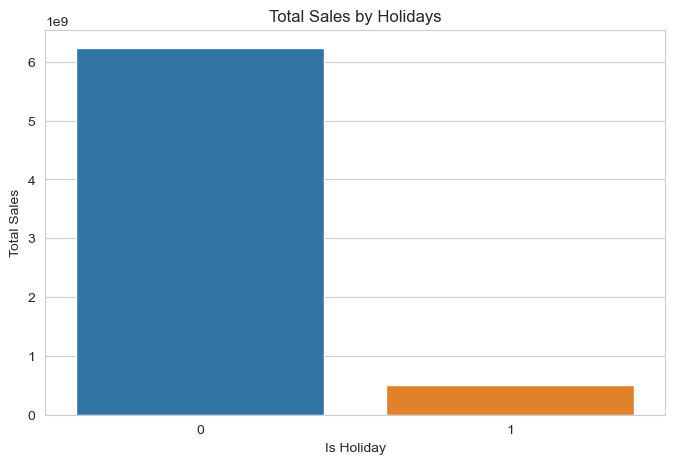

In [38]:
plt.figure(figsize = (8, 5))
sns.barplot(data = sales_by_Holidays,x = 'is_holiday',y = 'weekly_sales')
#Adding Labels and title
plt.title('Total Sales by Holidays')
plt.xlabel('Is Holiday', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

##### Conclusion:

* Total sales on holidays are lower than the normal days. Because no of Holidays are less as compare to the normal days.

### weekly_sales v/s temperature

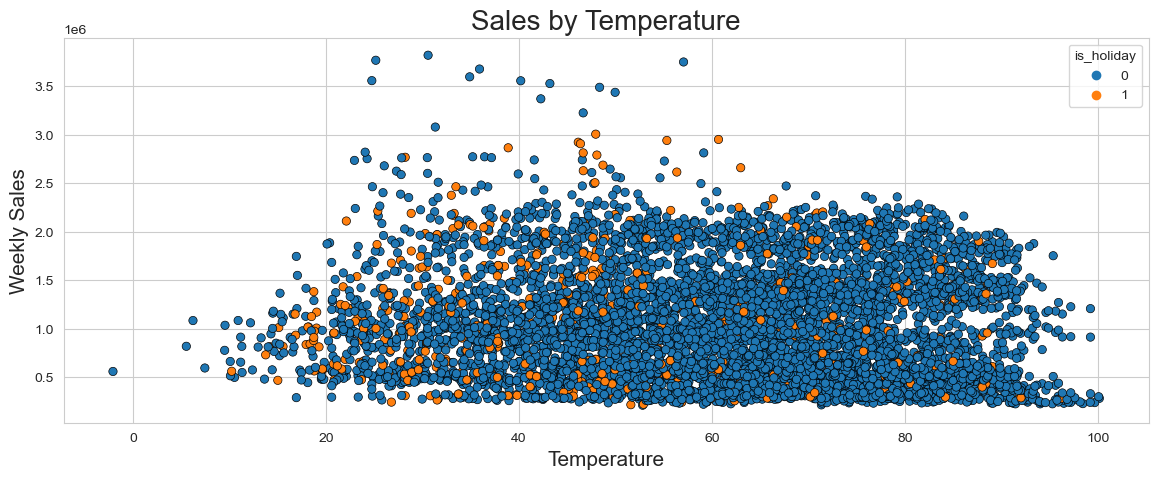

In [39]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,x = 'temperature',y = 'weekly_sales',hue='is_holiday',edgecolor = "black")
#Adding Labels and title
plt.title('Sales by Temperature', size = 20)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Weekly Sales', size = 15)
plt.show()

##### Conclusion:

* There is no effect of temperature in wekkly sales.

##### weekly_sales v/s fuel_price

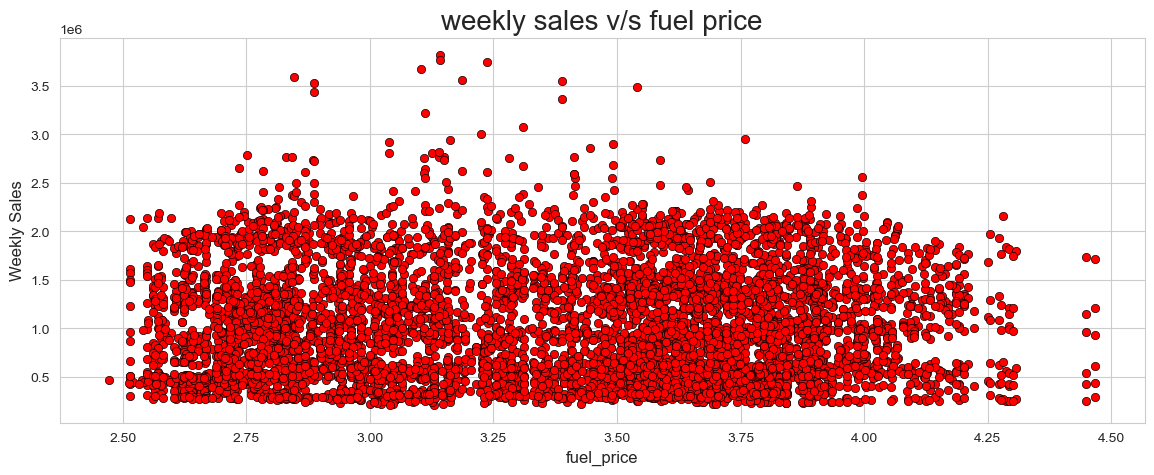

In [40]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,x = 'fuel_price',y = 'weekly_sales',edgecolor = "Black",color = 'red')
#Adding Labels and title
plt.title('weekly sales v/s fuel price', size = 20)
plt.xlabel('fuel_price', size = 12)
plt.ylabel('Weekly Sales', size = 12)
plt.show()

#### Conclusion:

* There is no effect of fuel_price in wekkly sales.

### weekly_sales v/s cpi (Consumer Price Index)

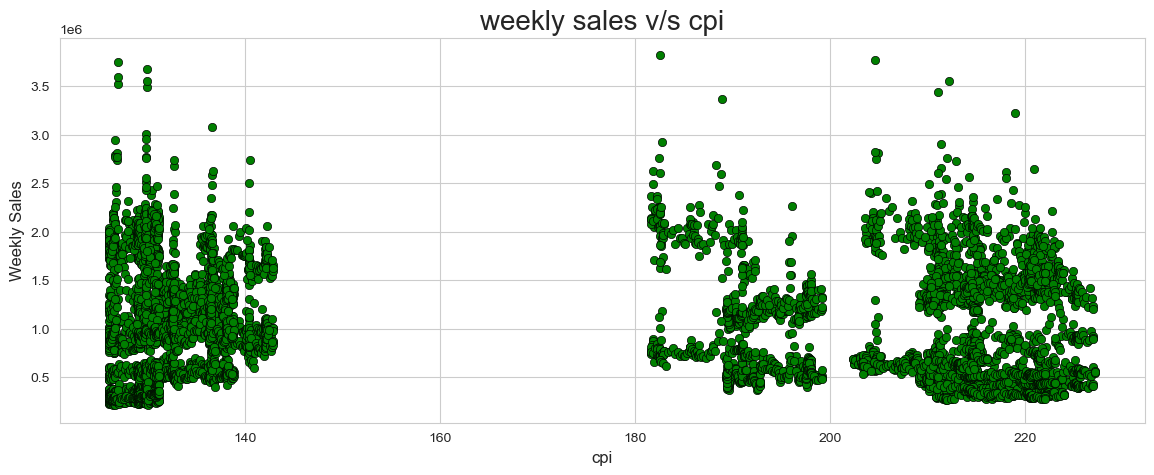

In [41]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,x = 'cpi',y = 'weekly_sales',edgecolor = "Black",color = 'green')
#Adding Labels and title
plt.title('weekly sales v/s cpi', size = 20)
plt.xlabel('cpi', size = 12)
plt.ylabel('Weekly Sales', size = 12)
plt.show()

###Conclusion:

* There is no effect of CPI on Weekly sales.
*  However, we can cluster the customers into 3 part as per the above graph:
*   customers who pay from 120 to 150 (Middle-class customers).
*    customers who pay from 180 to 200 (High-class customers).
*    customers who pay more than 200.(Affluent customers)

### weekly_sales v/s unemployment

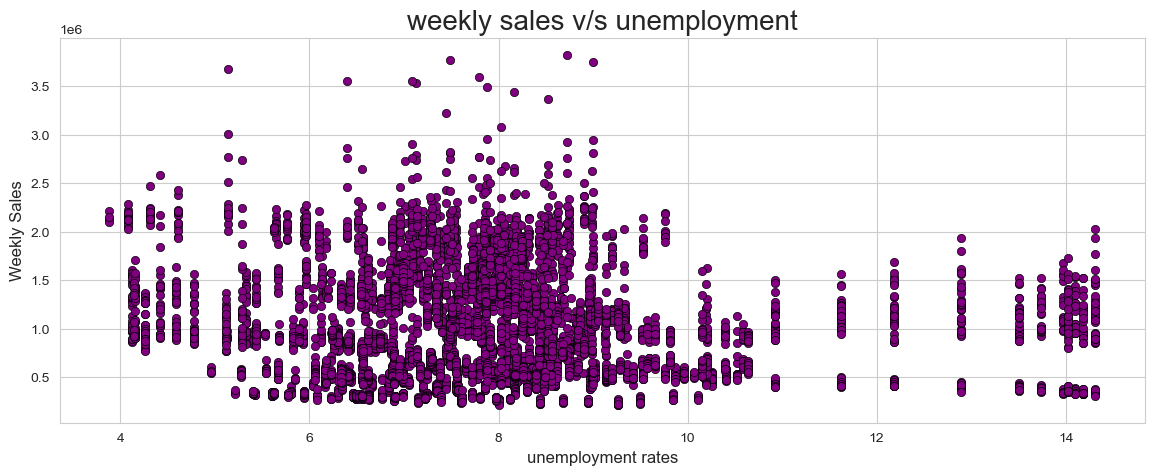

In [42]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,x = 'unemployment',y = 'weekly_sales',edgecolor = "black",color = 'purple')
#Adding Labels and title
plt.title('weekly sales v/s unemployment', size = 20)
plt.xlabel('unemployment rates', size = 12)
plt.ylabel('Weekly Sales', size = 12)
plt.show()

### Conclusion:

* We can see the effects of unemployement rates on sales.
* As the unemployement rate increases the weekly sales decreases

### Which stores are suffering the most because of the Unemployement rates.

In [43]:
struggling_store = df.groupby('store').agg({'weekly_sales': 'sum', 'unemployment': 'mean'}).reset_index()
struggling_store = struggling_store[(struggling_store['weekly_sales'] < struggling_store['weekly_sales'].mean()) & (struggling_store['unemployment'] > 9)]
struggling_store_sorted = struggling_store.sort_values(by='weekly_sales', ascending=True)
struggling_store_sorted

,store,weekly_sales,unemployment
37,38,"55,159,626",13
28,29,"77,141,554",10
42,43,"90,565,435",10
33,34,"138,249,763",10
11,12,"144,287,230",13


### Coclusion

* We can see store 38,29,43 are mostly affected by Unemplyement.


### Boxplot for checking outliers

0 fuel_price
1 temperature
2 cpi
3 unemployment


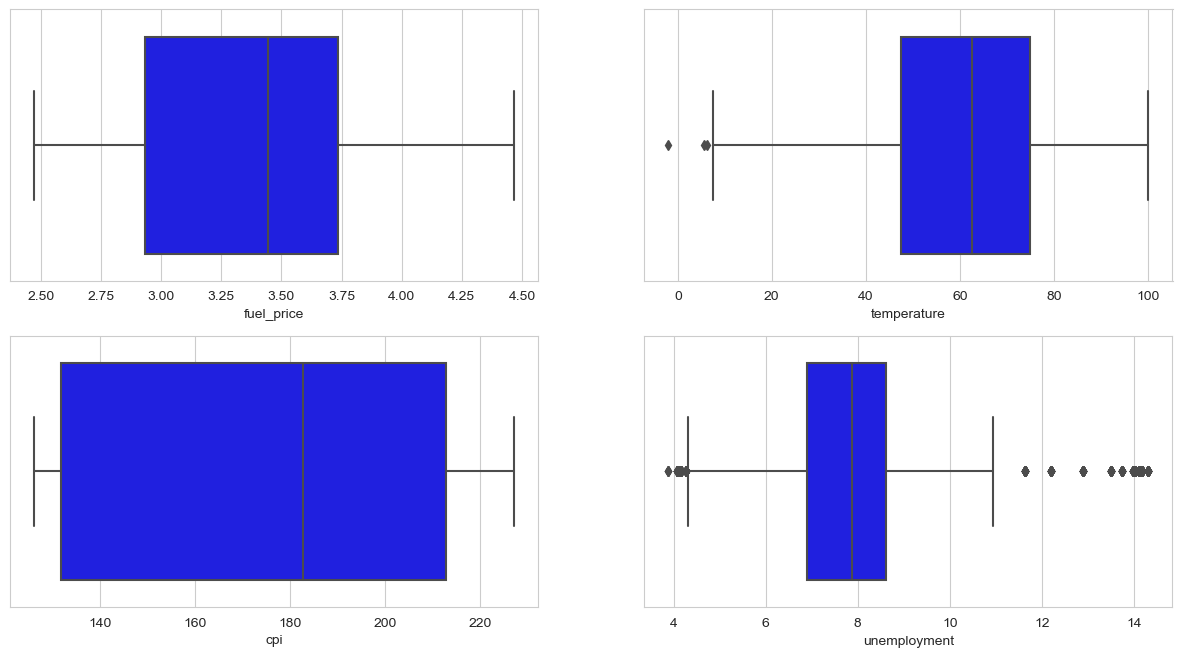

In [44]:
cols = ['fuel_price', 'temperature', 'cpi', 'unemployment']
plt.figure(figsize=(15,12))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(df, x = col, color = 'blue')
plt.show()

### Conclusion

* There are outliers in unemployement and temperature column.

### Data Correlation

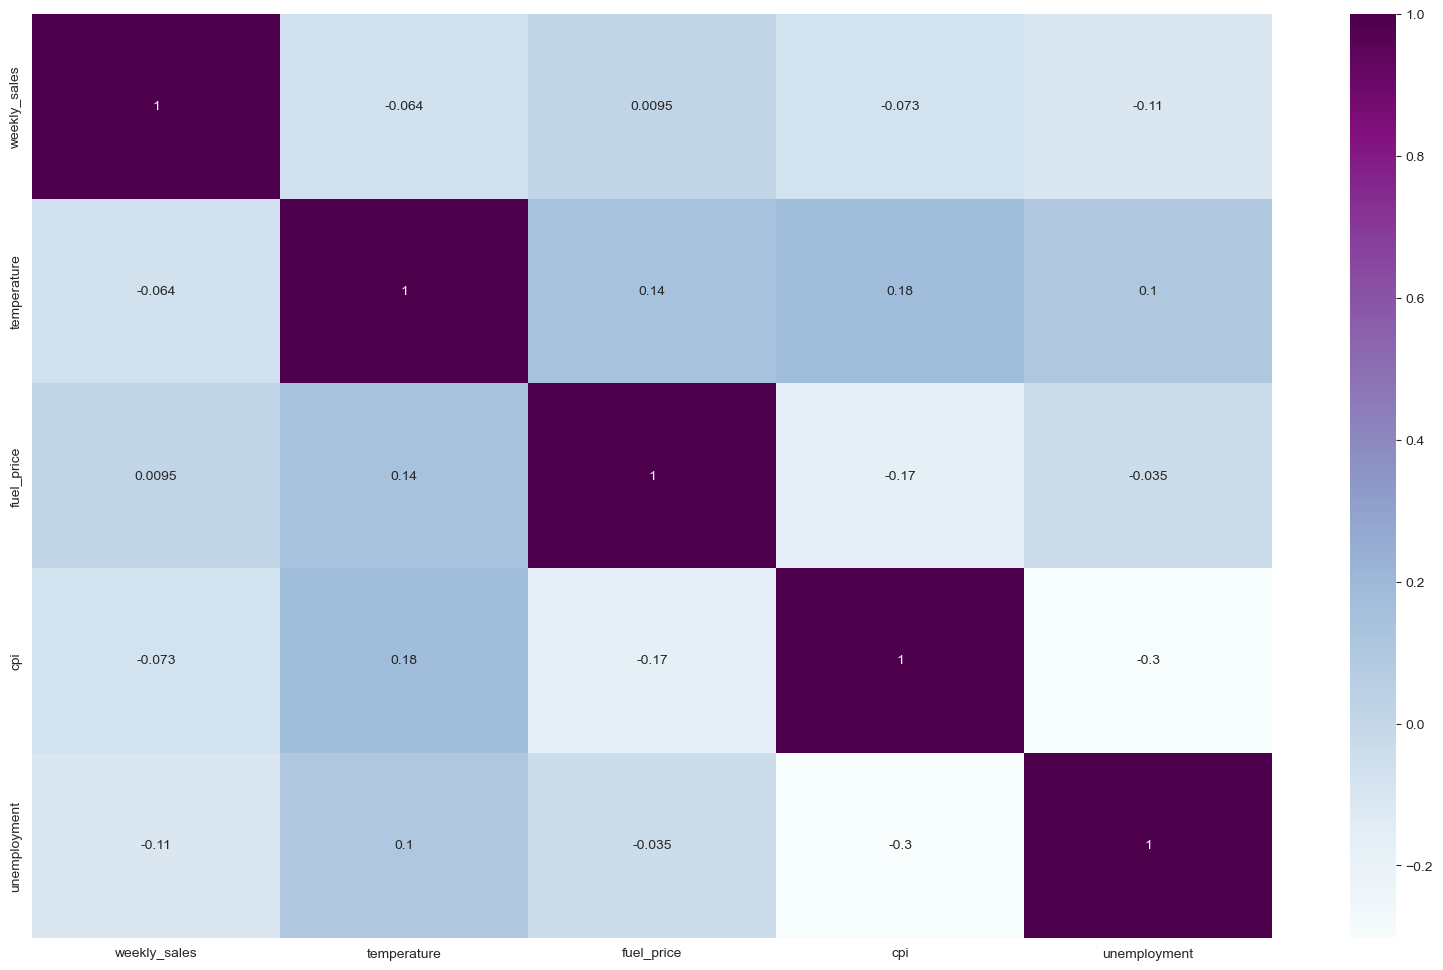

In [45]:
# Correlation Heatmap
plt.figure(figsize = (20, 12))
sns.heatmap(df[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr(), annot = True, cmap='BuPu')
plt.show()

## Data Mining

In [46]:
df

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,month,month_name,week,day_name,quarter,season
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,2,February,5,Friday,1,Winter
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,2,February,6,Friday,1,Winter
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,2,February,7,Friday,1,Winter
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,2,February,8,Friday,1,Winter
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,3,March,9,Friday,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,174",0,65,4,192,9,2012,9,September,39,Friday,3,Summer
6431,45,2012-10-05,"733,455",0,65,4,192,9,2012,10,October,40,Friday,4,Autumn
6432,45,2012-10-12,"734,464",0,54,4,192,9,2012,10,October,41,Friday,4,Autumn
6433,45,2012-10-19,"718,126",0,56,4,192,9,2012,10,October,42,Friday,4,Autumn


##### Dropping Unnecessary Columns

In [47]:
data_copy = df.drop(['date', 'year', 'quarter', 'month', 'day_name'], axis = 1)

In [48]:
data_copy

,store,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,month_name,week,season
0,1,"1,643,691",0,42,3,211,8,February,5,Winter
1,1,"1,641,957",1,39,3,211,8,February,6,Winter
2,1,"1,611,968",0,40,3,211,8,February,7,Winter
3,1,"1,409,728",0,47,3,211,8,February,8,Winter
4,1,"1,554,807",0,46,3,211,8,March,9,Winter
...,...,...,...,...,...,...,...,...,...,...
6430,45,"713,174",0,65,4,192,9,September,39,Summer
6431,45,"733,455",0,65,4,192,9,October,40,Autumn
6432,45,"734,464",0,54,4,192,9,October,41,Autumn
6433,45,"718,126",0,56,4,192,9,October,42,Autumn


### Removing Outliers

###### A. Identify potential outliers
* We have seen that there are outliers in Column unemployement and in temperature

###### B. We will follow IQR approach
* Interquartile Range (IQR): Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively.

###### C. Remove/Transform data points
* We will proceed with deleting data points.

In [49]:
columns_for_outlier_removal = ['temperature', 'unemployment']

In [50]:
# Function to remove outliers using IQR and remove entire rows
def remove_outliers_rows_iqr(df, columns_for_outlier_removal, k=1.5):
    for col in columns_for_outlier_removal:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [51]:
data_cleaned = remove_outliers_rows_iqr(data_copy, columns_for_outlier_removal)

0 temperature
1 fuel_price
2 cpi
3 unemployment


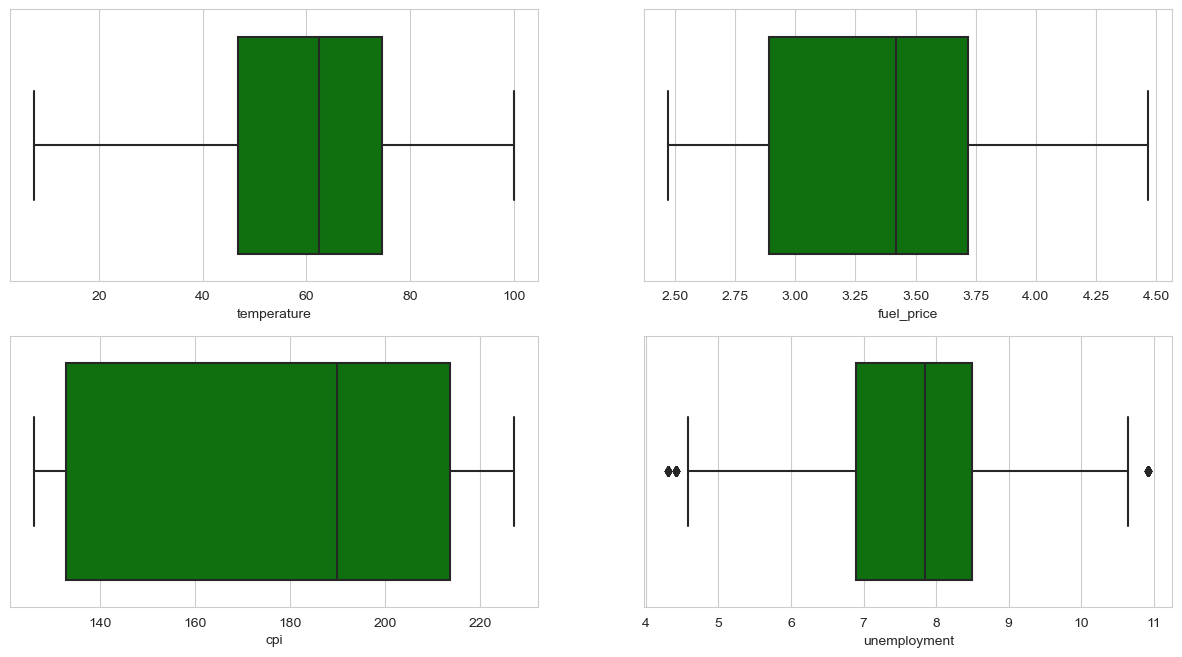

Number of data rows:  5951


In [52]:
cols = ['temperature', 'fuel_price', 'cpi', 'unemployment']
plt.figure(figsize=(15,12))
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_cleaned, x = col, color = 'g')
plt.show()

print('Number of data rows: ', data_cleaned.shape[0])

### Splitting The Data To Training And Testing Data

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler

In [54]:
X = data_cleaned.drop('weekly_sales', axis = 1)
y = data_cleaned['weekly_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [55]:
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5951, 9)
Shape of train data:  (4760, 9)
Shape of test data :  (1191, 9)


In [56]:
X_train.head()

,store,is_holiday,temperature,fuel_price,cpi,unemployment,month_name,week,season
4293,31,0,45,3,211,8,February,8,Winter
3558,25,0,76,3,215,7,July,27,Summer
4951,35,0,60,4,140,9,October,42,Autumn
3580,26,0,31,3,132,8,March,10,Winter
1555,11,0,88,3,225,7,June,26,Spring


In [57]:
y_train.head()

4293   1,344,354
3558     753,386
4951     811,328
3580     963,382
1555   1,297,029
Name: weekly_sales, dtype: float64

In [58]:
# Splitting the data into Numerical Features and Categorical Features
num_features = data_cleaned.select_dtypes('number').columns.to_list()
num_features.remove('weekly_sales')

cat_features = data_cleaned.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['store', 'is_holiday', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'week']
Categorical Features: ['month_name', 'season']


In [59]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5951 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         5951 non-null   int64  
 1   weekly_sales  5951 non-null   float64
 2   is_holiday    5951 non-null   int64  
 3   temperature   5951 non-null   float64
 4   fuel_price    5951 non-null   float64
 5   cpi           5951 non-null   float64
 6   unemployment  5951 non-null   float64
 7   month_name    5951 non-null   object 
 8   week          5951 non-null   UInt32 
 9   season        5951 non-null   object 
dtypes: UInt32(1), float64(5), int64(2), object(2)
memory usage: 494.0+ KB


In [60]:
# We can see Store, is_holiday column and week column is wrongly classifed. So let's change the dataype. 
data_cleaned['store'] = data_cleaned['store'].astype('object')
data_cleaned['is_holiday'] = data_cleaned['is_holiday'].astype('object')
data_cleaned['week'] = data_cleaned['week'].astype('object')

In [61]:
# Now splitting the data into Numerical Features and Categorical Features
num_features = data_cleaned.select_dtypes('number').columns.to_list()
num_features.remove('weekly_sales')

cat_features = data_cleaned.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['temperature', 'fuel_price', 'cpi', 'unemployment']
Categorical Features: ['store', 'is_holiday', 'month_name', 'week', 'season']


### Data Transformation using Column transformer

In [62]:
# data transformation pipeline
trf = ColumnTransformer([
                                  ('num_features', StandardScaler(), num_features),
                                  ('cat_features', BinaryEncoder(), cat_features),
                                ])

# Fitting the training data
trf.fit(X_train,y_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['temperature', 'fuel_price', 'cpi',
                                  'unemployment']),
                                ('cat_features', BinaryEncoder(),
                                 ['store', 'is_holiday', 'month_name', 'week',
                                  'season'])])

In [63]:
# Transform the training data
X_train_transformed = trf.transform(X_train)

# Transform the testing data
X_test_transformed = trf.transform(X_test)

In [64]:
def model_evaluation(estimator, Training_Testing, X, y):

    # Y predict of X train or X test
    predict_data = estimator.predict(X)

    print(f'{Training_Testing} Accuracy: \n')
    print(f'Root Mean Square Error: {round(np.sqrt(mean_squared_error(y, predict_data)), 2)}')
    print(f'R2_Square score: {round(r2_score(y, predict_data) * 100, 2)} % \n')

In [65]:
def cross_validation_score(estimator, X_train, y_train, score = 'r2', n = 5):

    validate = cross_val_score(estimator, X_train, y_train, scoring = score, cv = n)

    print(f'Cross Validation Scores: {validate} \n')
    print(f'Mean of Scores: {round(validate.mean() * 100, 2)} % \n')
    print(f'Standard Deviation of Scores: {validate.std()}')

In [66]:
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'r2', n = 5):

    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,
                               cv = n)

    # Fit the data
    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

## Model Creation

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Linear Regression Model

In [69]:
LR = LinearRegression()

# Fitting the data
LR.fit(X_train_transformed, y_train)

LinearRegression()

* Evaluation of training data.

In [70]:
model_evaluation(LR, 'Training', X_train_transformed, y_train)

Training Accuracy: 

Root Mean Square Error: 529898.57
R2_Square score: 14.55 % 



### Conclusion:
    
* Since there are no linear correlations between variables and targets, The model seems to be not doing well in learning from the training dataset.

## Decision Tree Regressor

In [71]:
DT = DecisionTreeRegressor()

# Fitting the training data
DT.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

### Evaluation of training data.

In [72]:
model_evaluation(DT, 'Training', X_train_transformed, y_train)

Training Accuracy: 

Root Mean Square Error: 0.0
R2_Square score: 100.0 % 



#### Conclusion:

* The model has overfitting, so let's improve it by tuning the hyperparameters.

### Tuning The Model

In [73]:
#Using grid search cv to tune the parameters.
param_grid = {'max_depth': np.arange(2, 15),
              'min_samples_split': [10, 20, 30, 40, 50, 100, 200, 300]}

best_estimator = hyperparameter_tunning(DT, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best_Tree = best_estimator

Best parameters: {'max_depth': 13, 'min_samples_split': 10} 

Best score: 0.9422641373671418


### Conclusion:

* After tuning the hyperparameter of max_depth and min_samples_split, The model seems to have improved well in learning from the training dataset.


## Cross validating the score

In [74]:
cross_validation_score(Best_Tree, X_train_transformed, y_train, n = 10)

Cross Validation Scores: [0.95325871 0.94594243 0.95297402 0.94035147 0.96076697 0.9452746
 0.93747608 0.95362469 0.94180473 0.95115472] 

Mean of Scores: 94.83 % 

Standard Deviation of Scores: 0.006896265245961406


## Testing the Model

In [75]:
model_evaluation(Best_Tree, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

Root Mean Square Error: 118161.21
R2_Square score: 95.68 % 



## Conclusion:

* After testing the Decision Tree Regressor model, it became clear that it is the best model with an accuracy of 95.75 % compared to Linear Regression.

## Random Forest Regressor

In [76]:
RF = RandomForestRegressor()

# Fitting the training data
RF.fit(X_train_transformed, y_train)

RandomForestRegressor()

#### Evaluation of training data.

In [77]:
model_evaluation(RF, 'Training', X_train_transformed, y_train)

Training Accuracy: 

Root Mean Square Error: 42898.94
R2_Square score: 99.44 % 



### Conclusion:

* It seems like the model is overfitted.let's be sure of that by doing a cross-validation score.

In [78]:
cross_validation_score(RF, X_train_transformed, y_train, n = 10)

Cross Validation Scores: [0.96122764 0.96388503 0.96256252 0.96209685 0.95910251 0.95382929
 0.95313564 0.9573882  0.95888758 0.95284028] 

Mean of Scores: 95.85 % 

Standard Deviation of Scores: 0.003876254142873377


### Conclusion:

* After doing a cross-validation score, we see the model has trained very well.

#### Testing the Model

In [79]:
model_evaluation(RF, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

Root Mean Square Error: 113860.39
R2_Square score: 95.98 % 



### Conclusion:

* After testing the Random Forest Regressor model, it became clear that it is the best model with an accuracy of 96.13% compared to the above algorithms we used (e.g. Linear Regression and Decision Tree Regressor).

# Time Series Forecasting (Univariate)

In [80]:
data_cleaned

,store,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,month_name,week,season
0,1,"1,643,691",0,42,3,211,8,February,5,Winter
1,1,"1,641,957",1,39,3,211,8,February,6,Winter
2,1,"1,611,968",0,40,3,211,8,February,7,Winter
3,1,"1,409,728",0,47,3,211,8,February,8,Winter
4,1,"1,554,807",0,46,3,211,8,March,9,Winter
...,...,...,...,...,...,...,...,...,...,...
6430,45,"713,174",0,65,4,192,9,September,39,Summer
6431,45,"733,455",0,65,4,192,9,October,40,Autumn
6432,45,"734,464",0,54,4,192,9,October,41,Autumn
6433,45,"718,126",0,56,4,192,9,October,42,Autumn


In [81]:
df

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,month,month_name,week,day_name,quarter,season
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,2,February,5,Friday,1,Winter
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,2,February,6,Friday,1,Winter
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,2,February,7,Friday,1,Winter
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,2,February,8,Friday,1,Winter
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,3,March,9,Friday,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,174",0,65,4,192,9,2012,9,September,39,Friday,3,Summer
6431,45,2012-10-05,"733,455",0,65,4,192,9,2012,10,October,40,Friday,4,Autumn
6432,45,2012-10-12,"734,464",0,54,4,192,9,2012,10,October,41,Friday,4,Autumn
6433,45,2012-10-19,"718,126",0,56,4,192,9,2012,10,October,42,Friday,4,Autumn


In [82]:
#Removing unnecessary columns.
data_tsa =df.drop(['is_holiday','temperature','fuel_price','cpi','unemployment','year', 'quarter', 'month','month_name','week', 'day_name','season'], axis = 1)

In [83]:
data_tsa

,store,date,weekly_sales
0,1,2010-02-05,"1,643,691"
1,1,2010-02-12,"1,641,957"
2,1,2010-02-19,"1,611,968"
3,1,2010-02-26,"1,409,728"
4,1,2010-03-05,"1,554,807"
...,...,...,...
6430,45,2012-09-28,"713,174"
6431,45,2012-10-05,"733,455"
6432,45,2012-10-12,"734,464"
6433,45,2012-10-19,"718,126"


In [84]:
data_tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 150.9 KB


In [85]:
#setting Date column as index
data_tsa.set_index('date', inplace=True)

In [86]:
data_tsa.head(10)

,store,weekly_sales
date,,
2010-02-05,1,"1,643,691"
2010-02-12,1,"1,641,957"
2010-02-19,1,"1,611,968"
2010-02-26,1,"1,409,728"
2010-03-05,1,"1,554,807"
2010-03-12,1,"1,439,542"
2010-03-19,1,"1,472,516"
2010-03-26,1,"1,404,430"
2010-04-02,1,"1,594,968"


### Quick Observation for weekly sales.

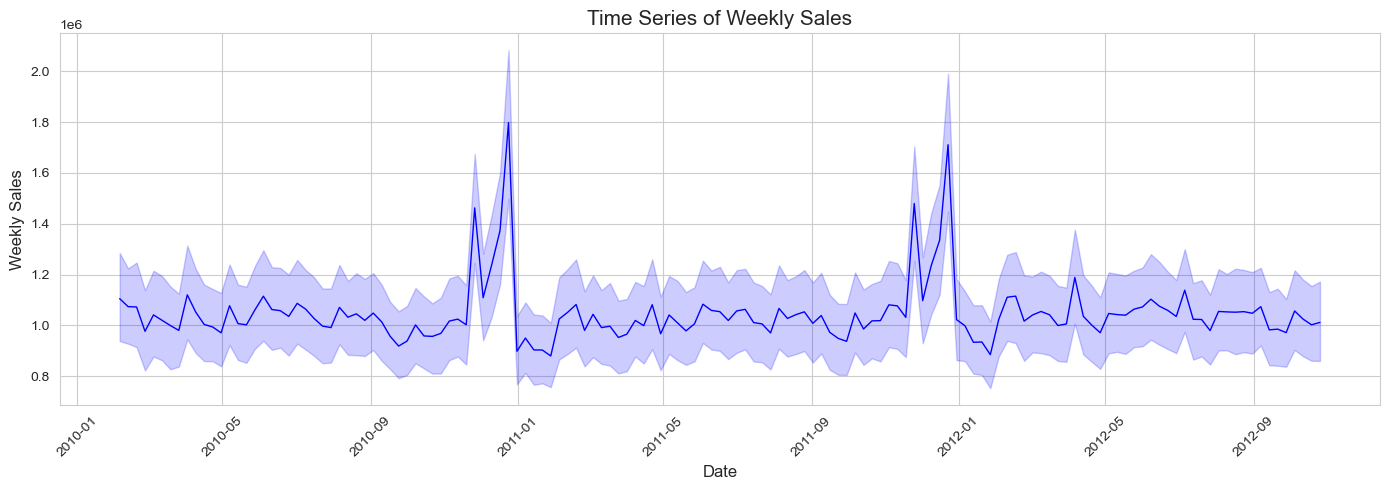

In [87]:
plt.figure(figsize=(14,5))
sns.lineplot(data=data_tsa, x=data_tsa.index, y='weekly_sales', color='b', linewidth=1)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Weekly Sales',fontsize=12)
plt.title('Time Series of Weekly Sales',fontsize=15)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [88]:
#Function for stationary check
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [90]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [92]:
##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")

In [93]:
def analyze_store(store_id):
    # Filter data for the store
    store_data = data_tsa[data_tsa['store'] == store_id]['weekly_sales']
    sales_df = store_data.to_frame()

    # Visualize time series data
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=sales_df, color='b', linewidth=1)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Weekly Sales', fontsize=12)
    plt.title(f'Time Series of Weekly Sales for Store {store_id}', fontsize=15)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Decompose time series to check components
    result_mul = seasonal_decompose(sales_df, model='multiplicative', extrapolate_trend='freq')
    result_add = seasonal_decompose(sales_df, model='additive', extrapolate_trend='freq')

    plt.rcParams.update({'figure.figsize': (20, 15)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.tight_layout()
    plt.show()
    
    
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))

    # Plot multiplicative decomposition (Trend)
    axes[0, 0].plot(result_mul.trend, color='red', linewidth=1, label='Trend (Multiplicative)')
    axes[0, 0].set_ylabel('Value')
    axes[0, 0].legend()

    # Plot additive decomposition (Trend)
    axes[0, 1].plot(result_add.trend, color='red', linewidth=1, label='Trend (Additive)')
    axes[0, 1].set_ylabel('Value')
    axes[0, 1].legend()

    # Plot multiplicative decomposition (Seasonal)
    axes[1, 0].plot(result_mul.seasonal, color='blue', linewidth=1, label='Seasonal (Multiplicative)')
    axes[1, 0].set_ylabel('Value')
    axes[1, 0].legend()
    axes[1, 0].legend(loc='upper left')

    # Plot additive decomposition (Seasonal)
    axes[1, 1].plot(result_add.seasonal, color='blue', linewidth=1, label='Seasonal (Additive)')
    axes[1, 1].set_ylabel('Value')
    axes[1, 1].legend()
    axes[1, 1].legend(loc='upper left')

    # Plot multiplicative decomposition residuals
    axes[2, 0].plot(result_mul.resid, color='green', linewidth=1, label='Residual (Multiplicative)')
    axes[2, 0].set_ylabel('Value')
    axes[2, 0].legend()

    # Plot additive decomposition residuals
    axes[2, 1].plot(result_add.resid, color='green', linewidth=1, label='Residual (Additive)')
    axes[2, 1].set_ylabel('Value')
    axes[2, 1].legend()

    # Set titles for rows
    axes[0, 0].set_title('Multiplicative Decomposition: Trend')
    axes[0, 1].set_title('Additive Decomposition: Trend')
    axes[1, 0].set_title('Multiplicative Decomposition: Seasonal')
    axes[1, 1].set_title('Additive Decomposition: Seasonal')
    axes[2, 0].set_title('Multiplicative Decomposition: Residual')
    axes[2, 1].set_title('Additive Decomposition: Residual')

    plt.tight_layout()
    plt.show()

    # Perform ADF test for stationarity
    adf_test(sales_df['weekly_sales'])

    # Calculate rolling mean and rolling std
    mean_log = sales_df.rolling(window=7).mean()
    std_log = sales_df.rolling(window=7).std()

    # Plot rolling mean and rolling std
    plt.figure(figsize=(12, 8))
    plt.plot(sales_df, color='blue', linewidth=2, label='Original')
    plt.plot(mean_log, color='red', linestyle='--', linewidth=2, label='Rolling Mean')
    plt.plot(std_log, color='black', linestyle='--', linewidth=2, label='Rolling Std')
    plt.legend(loc='upper left')
    plt.title('Rolling Mean and Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()

    # Split the data into train and test sets
    train_size = int(len(sales_df) * 0.8)
    train, test = sales_df[:train_size], sales_df[train_size:]

    # ARIMA model
    model_arima = ARIMA(train['weekly_sales'], order=(2, 0, 7))  # Example order, you can tune this
    model_fit_arima = model_arima.fit()

    # Testing with ARIMA model
    sales_df['predicted_test_value_arima'] = model_fit_arima.predict(start=len(train), end=len(train) + len(test) - 1,
                                                                dynamic=True)

    # Plot ARIMA forecast
    plt.figure()
    plt.plot(train.index, train['weekly_sales'], label='Train', linewidth=1)
    plt.plot(test.index, test['weekly_sales'], label='Actual_Test', linewidth=1)
    plt.plot(sales_df.index, sales_df['predicted_test_value_arima'], label='Predicted_Test', linewidth=1, color='green')
    plt.title(f'Store {store_id} ARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

    # SARIMAX model
    model_sarimax = SARIMAX(train, order=(2, 0, 7), seasonal_order=(2, 0, 7, 12))
    model_fit_sarimax = model_sarimax.fit()

    # Testing with SARIMAX model
    sales_df['predicted_test_value_sarimax'] = model_fit_sarimax.predict(start=len(train),
                                                                    end=len(train) + len(test) - 1,
                                                                    dynamic=True)

    # Plot SARIMAX Testing
    plt.figure()
    plt.plot(train.index, train['weekly_sales'], label='Train', linewidth=1)
    plt.plot(test.index, test['weekly_sales'], label='Actual_Test', linewidth=1)
    plt.plot(sales_df.index, sales_df['predicted_test_value_sarimax'], label='Predicted_Test', linewidth=1, color='green')
    plt.title(f'Store {store_id} SARIMAX Testing')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()
    
    # Forecasting future values using SARIMAX
    last_test_date = sales_df.index.max()
    future_dates = pd.date_range(start=last_test_date, periods=12, freq='W')

    # Predicting the future values using SARIMAX model
    predicted_future_values = model_fit_sarimax.forecast(steps=12, dynamic=True)

    # Creating a DataFrame for predicted future values
    future_sales_df = pd.DataFrame({'date': future_dates, f'predicted_future_value_sarimax_store_{store_id}': predicted_future_values})

    # Concatenating the future sales DataFrame with the original sales DataFrame
    sales_df = pd.concat([sales_df, future_sales_df.set_index('date')], axis=1)
    
    # Plotting SARIMAX Testing
    plt.figure()
    plt.plot(train.index, train['weekly_sales'], label='Train', linewidth=1)
    plt.plot(test.index, test['weekly_sales'], label='Actual_Test', linewidth=1,color = 'black')
    plt.plot(sales_df.index, sales_df['predicted_test_value_sarimax'], label='Predicted_Test', linewidth=1, color='red')
    plt.plot(sales_df.index, sales_df[f'predicted_future_value_sarimax_store_{store_id}'], label='Predicted_next_12_weeks', linewidth=1, color='green')
    plt.title(f'Store {store_id} SARIMAX Forecasting')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

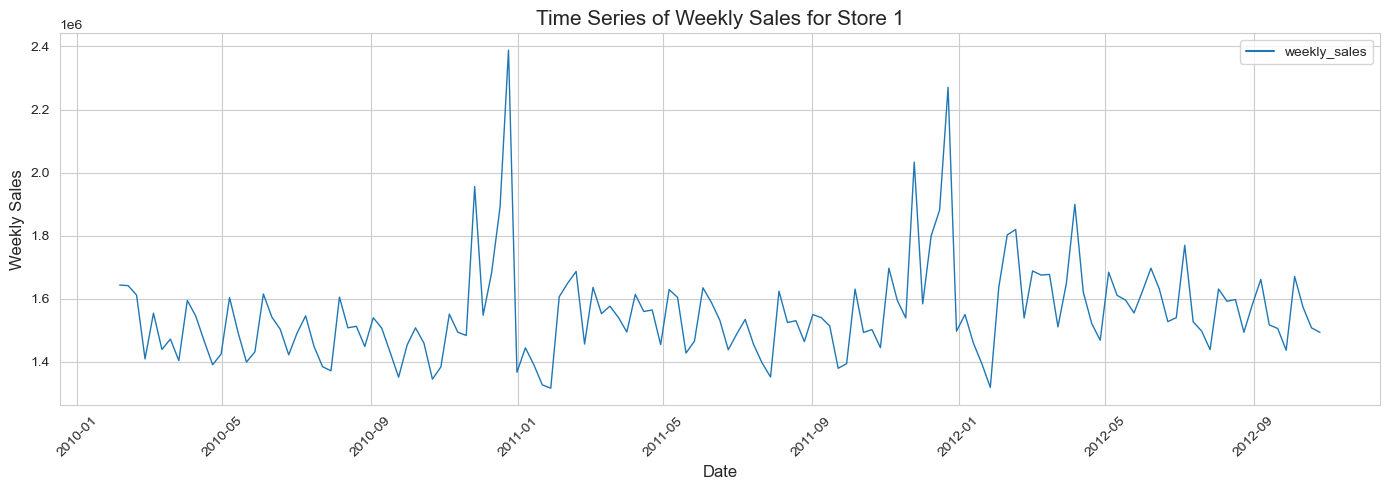

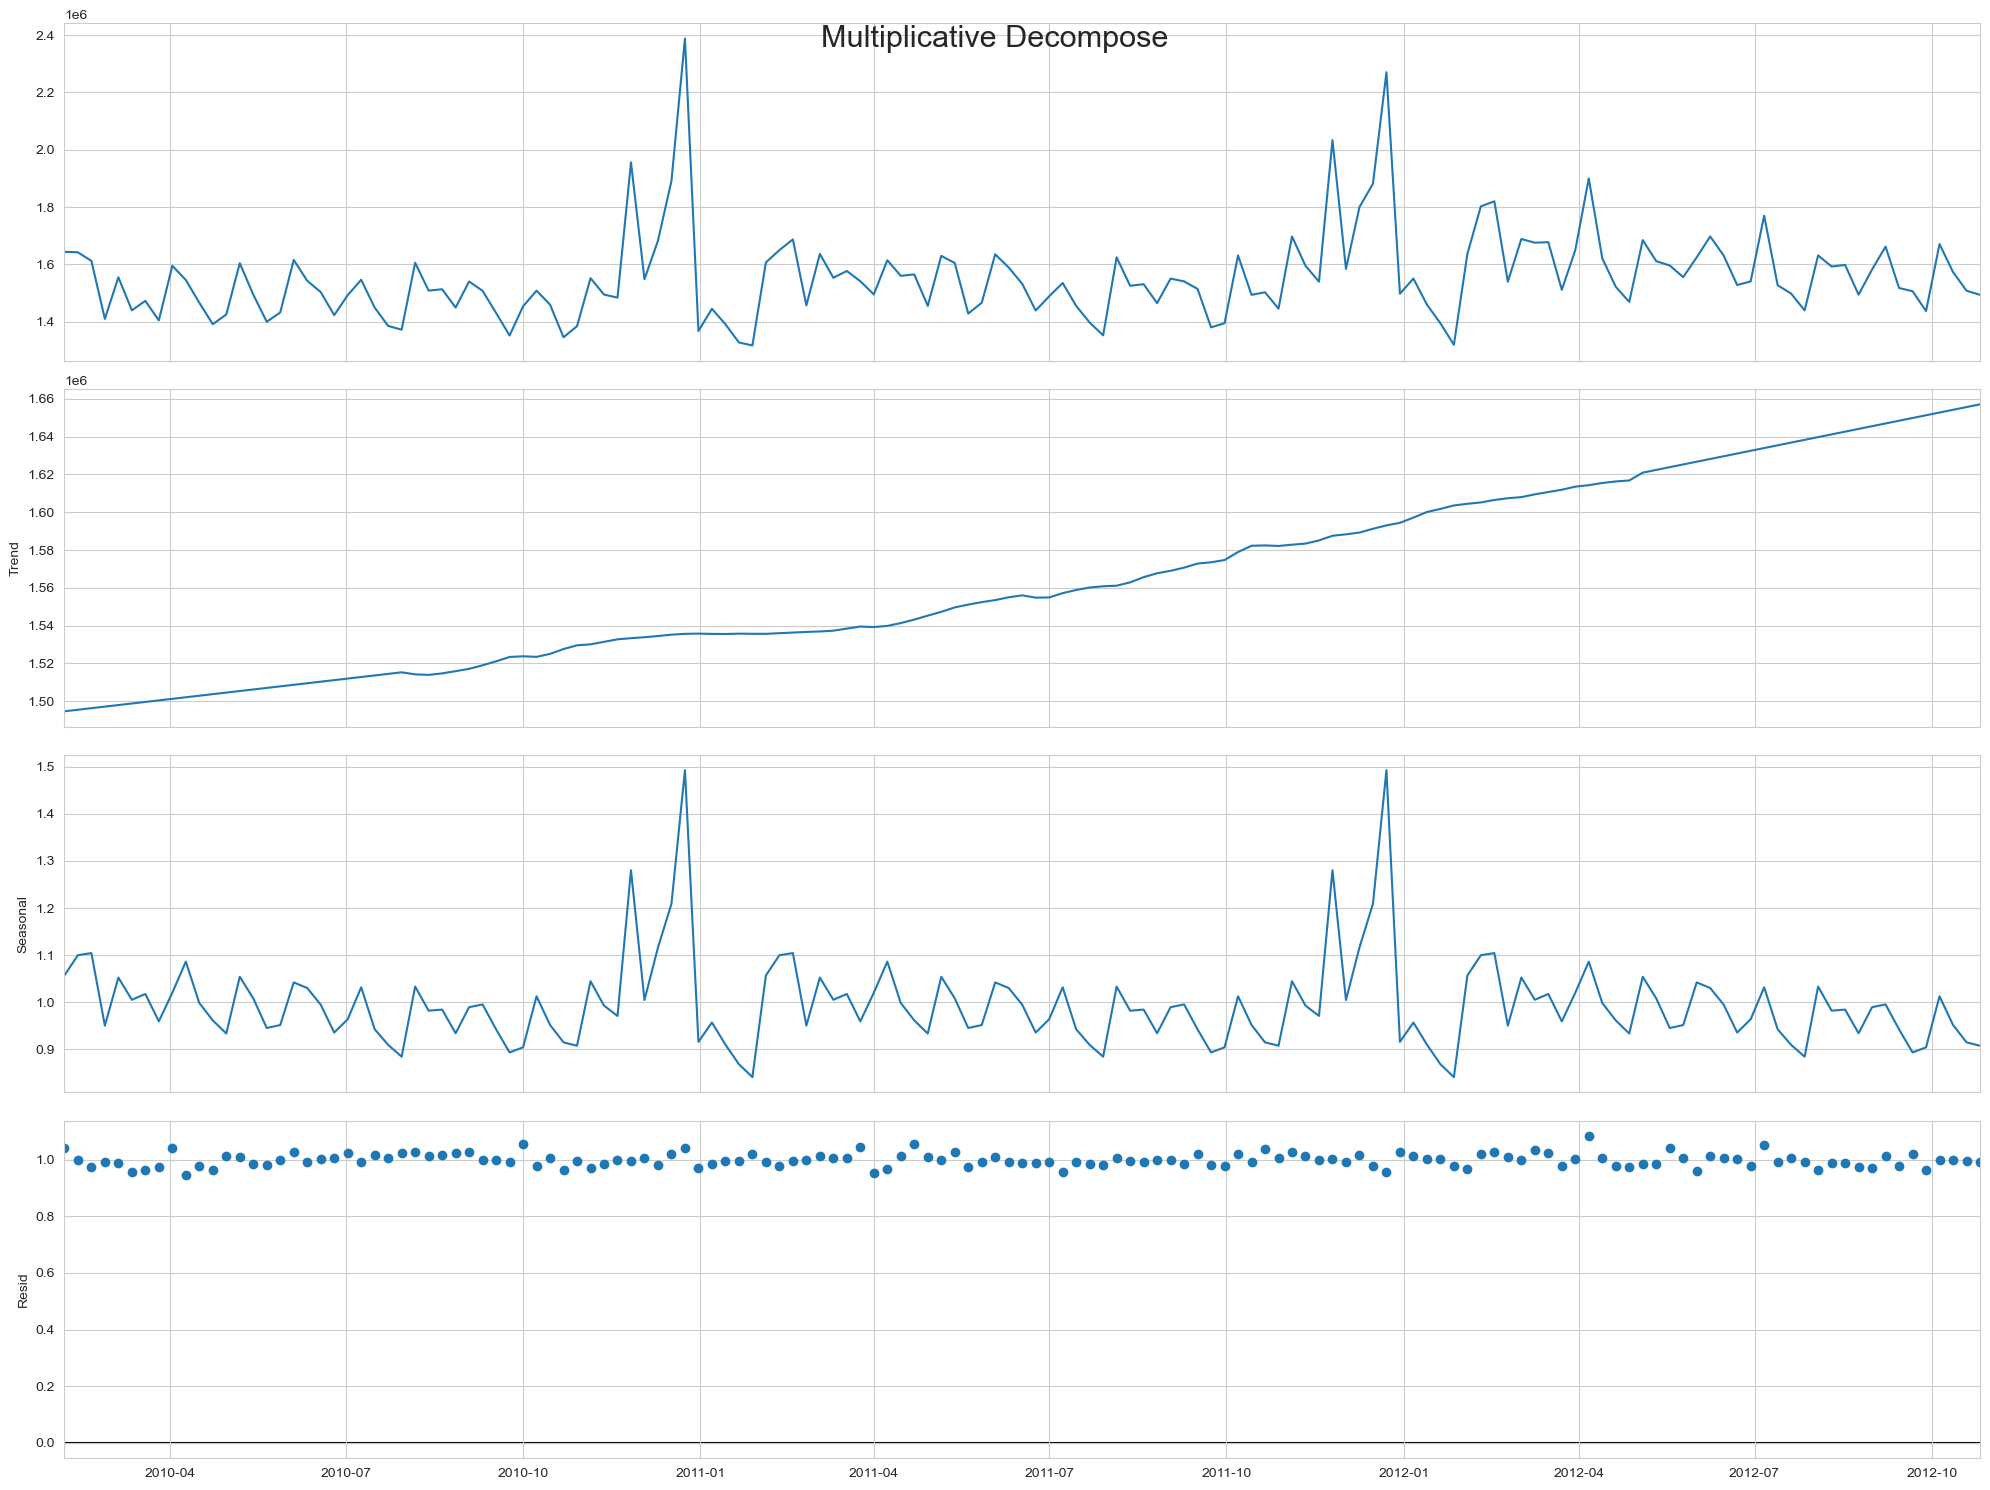

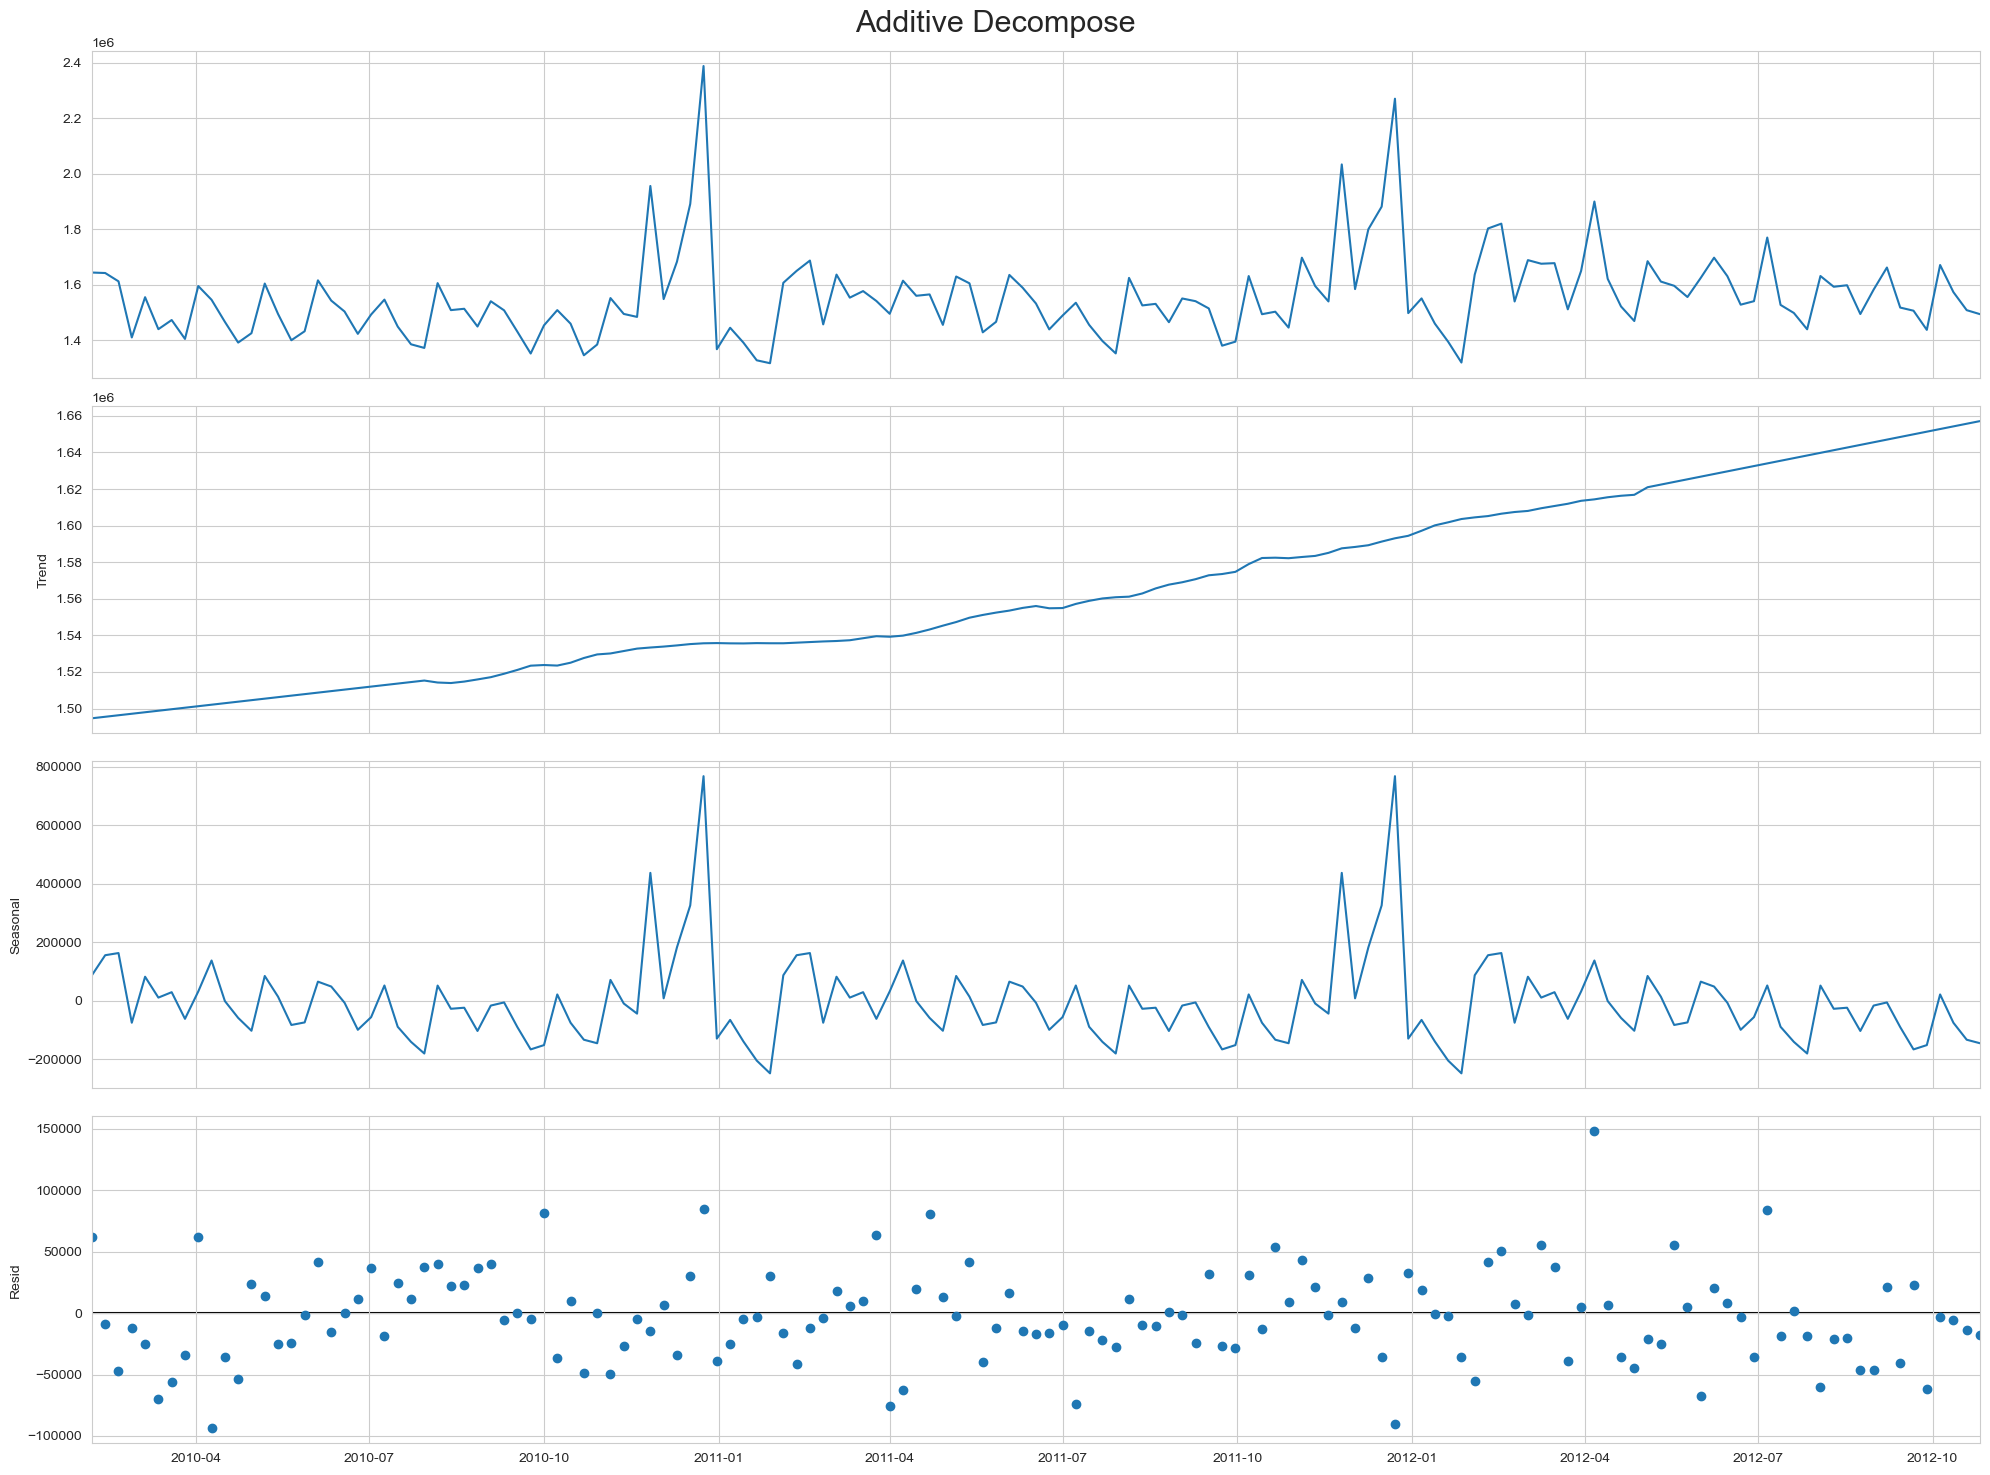

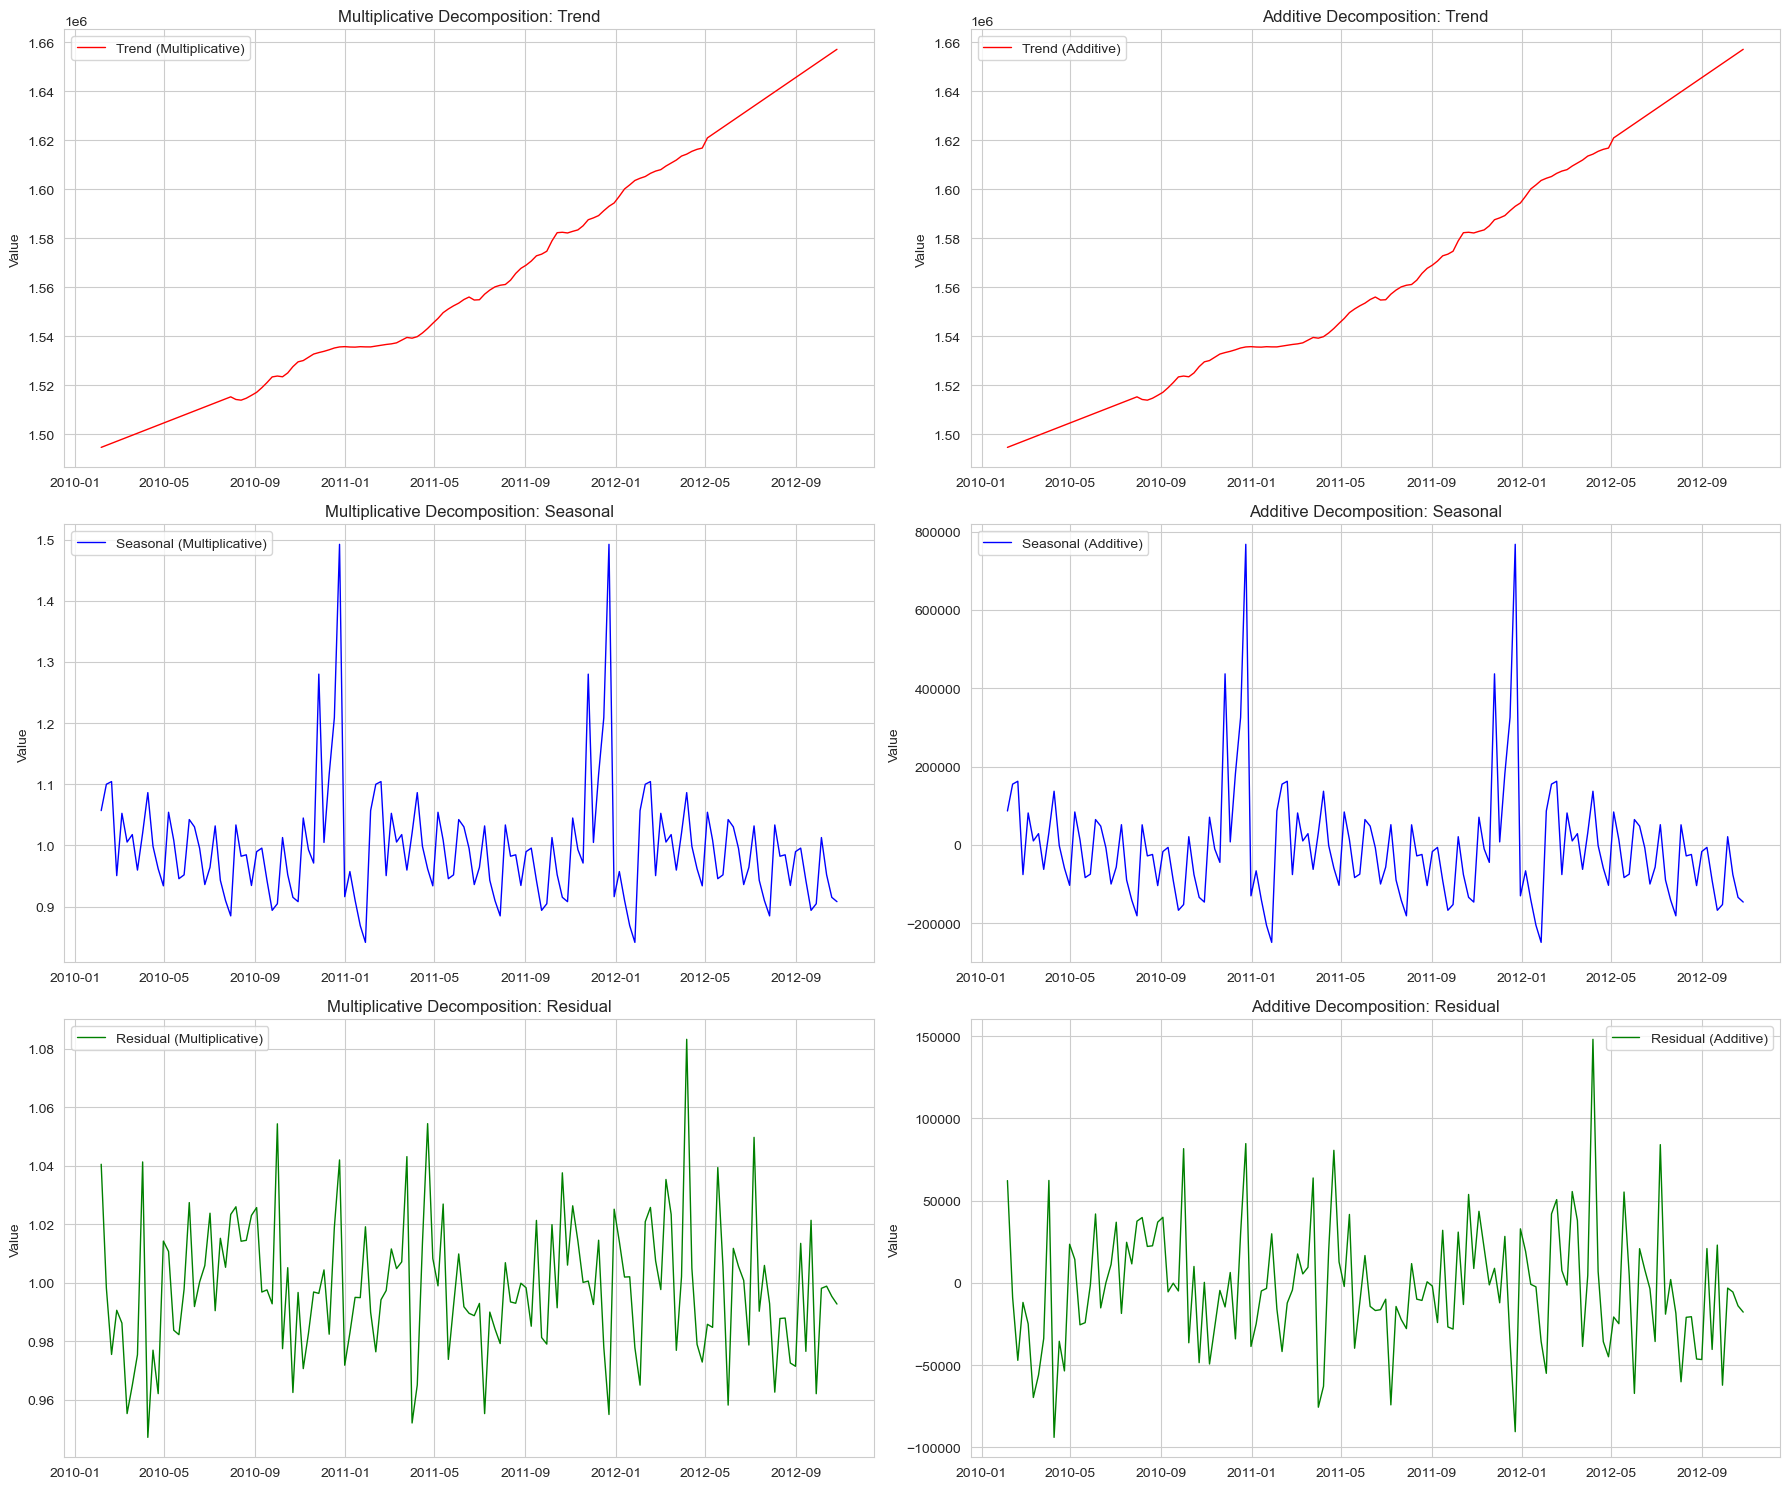

ADF Statistics: -5.1021861451922845
p- value: 1.3877788330759666e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


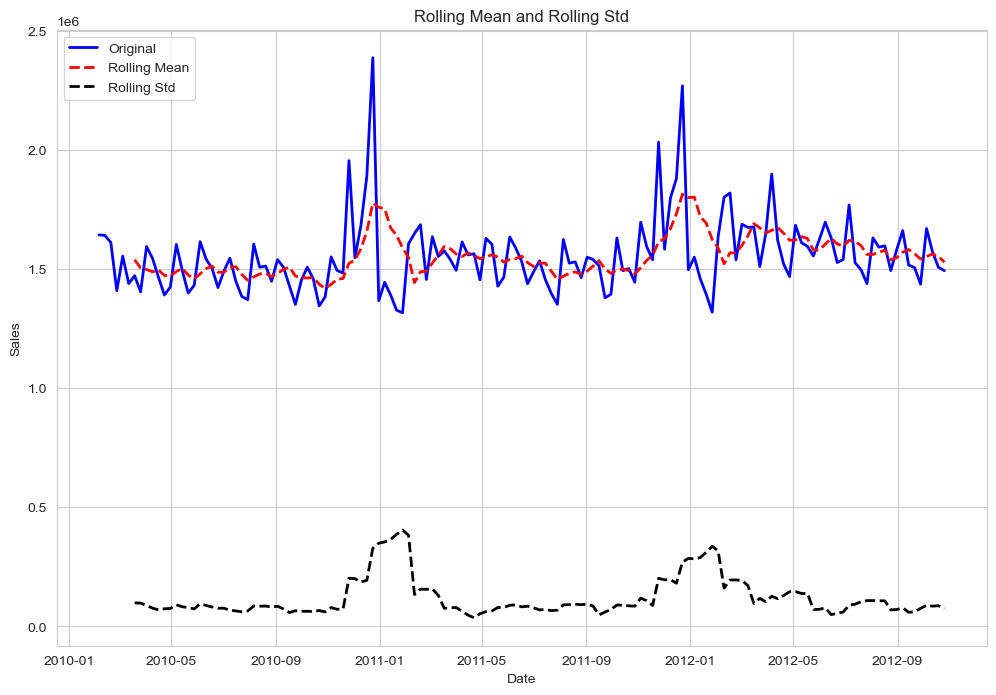

C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


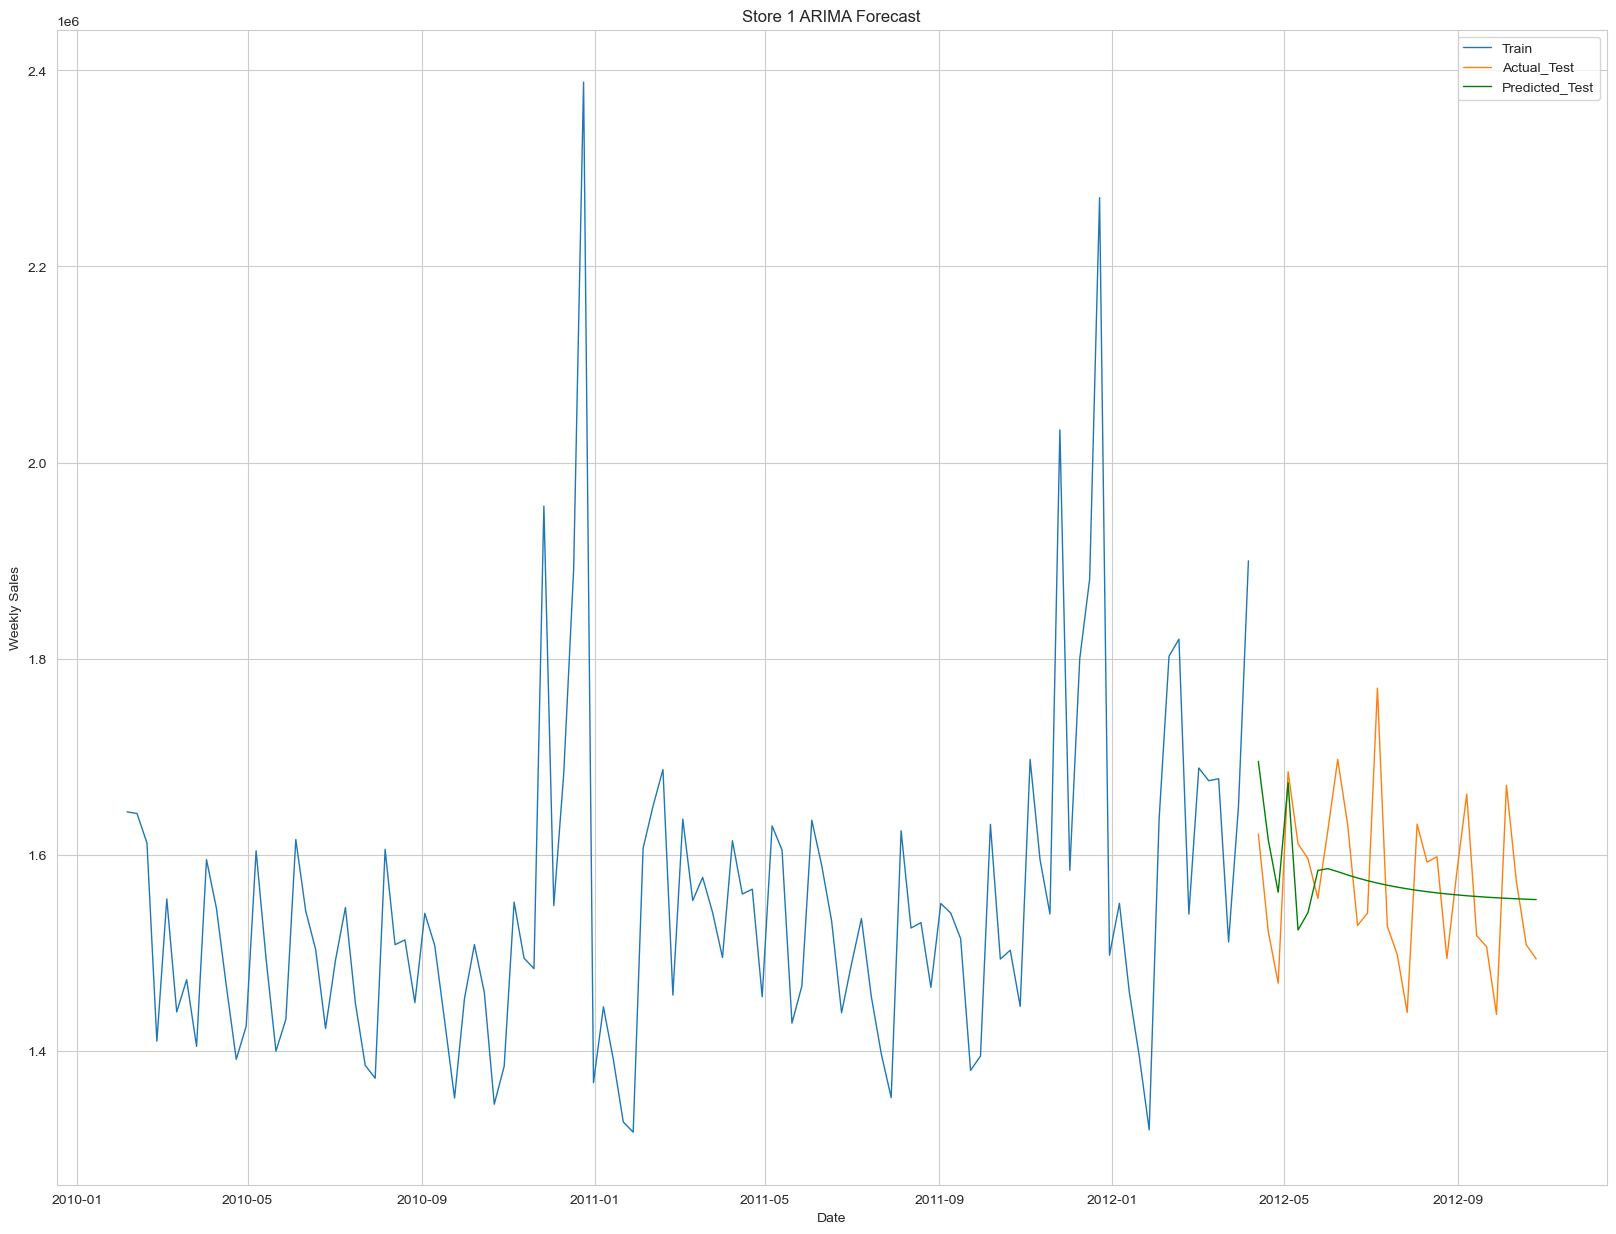

C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


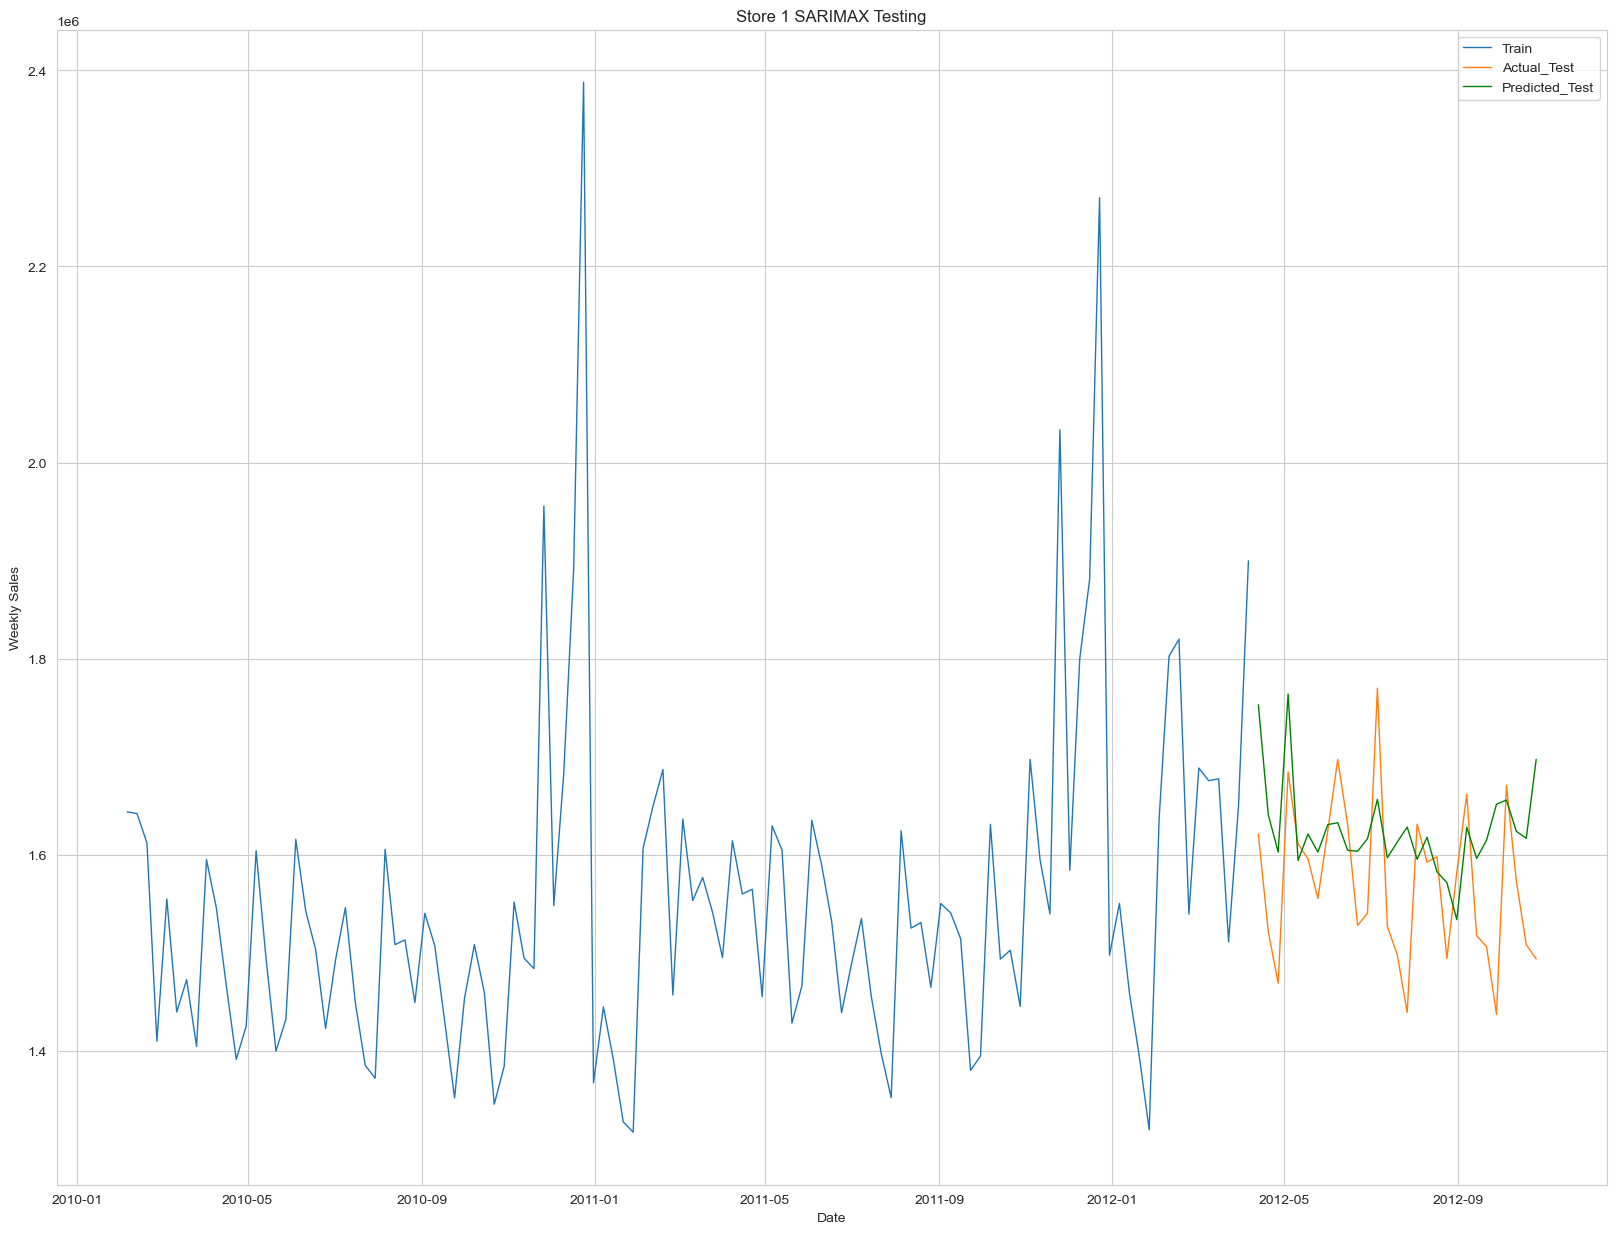

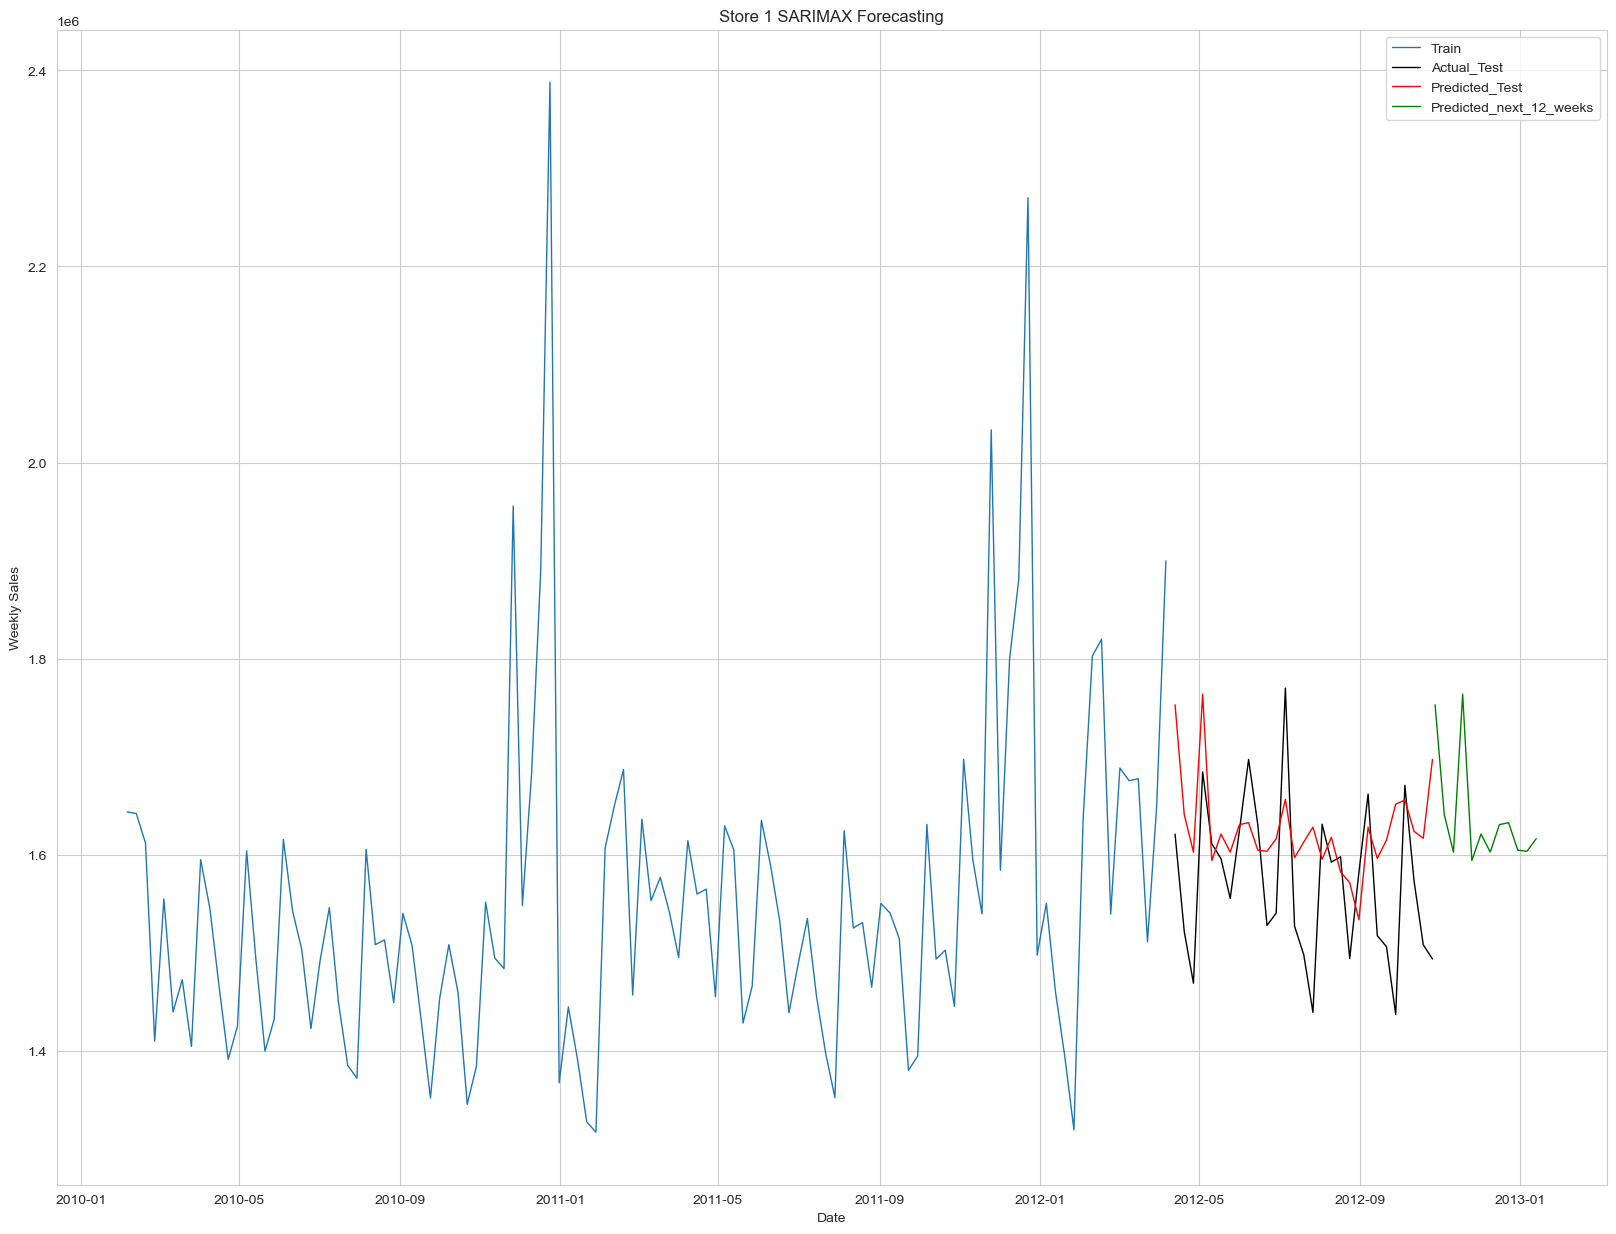

In [94]:
analyze_store(1)